### Initial Model

#### Download And Import Packages

In [1]:
!pip3 install numpy matplotlib pandas scikit-learn seaborn statsmodels

You should consider upgrading via the 'C:\Users\shubh\OneDrive\Desktop\learningOfLLM's\dataScience&ML\premierLeaguePrediction\virtual\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### Import The Dataset

In [3]:
data = pd.read_csv('dataset/matches.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1389 non-null   int64  
 1   date          1389 non-null   object 
 2   time          1389 non-null   object 
 3   comp          1389 non-null   object 
 4   round         1389 non-null   object 
 5   day           1389 non-null   object 
 6   venue         1389 non-null   object 
 7   result        1389 non-null   object 
 8   gf            1389 non-null   float64
 9   ga            1389 non-null   float64
 10  opponent      1389 non-null   object 
 11  xg            1389 non-null   float64
 12  xga           1389 non-null   float64
 13  poss          1389 non-null   float64
 14  attendance    693 non-null    float64
 15  captain       1389 non-null   object 
 16  formation     1389 non-null   object 
 17  referee       1389 non-null   object 
 18  match report  1389 non-null 

#### Data Cleaning

In [4]:
data = data.drop(['notes'], axis=1)

In [5]:
data = data.drop(['comp'], axis=1)

In [6]:
data = data.drop(['match report'], axis=1)

In [7]:
data = data.drop(['Unnamed: 0'], axis=1)

In [8]:
data = data.drop(['captain'], axis=1)

**The notes column (feature) was empty, so there was no necessary information to extract from it.**
**The comp column (feature) does not contain the necessary information to extract. Only one value Premier League.**
**The match report (features) does not contain the necessary information to extract. Only one value Match Report.**
**Also, the captain name it is infinite so it is unnecessary to hold the captain of the teams information.**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1389 non-null   object 
 1   time        1389 non-null   object 
 2   round       1389 non-null   object 
 3   day         1389 non-null   object 
 4   venue       1389 non-null   object 
 5   result      1389 non-null   object 
 6   gf          1389 non-null   float64
 7   ga          1389 non-null   float64
 8   opponent    1389 non-null   object 
 9   xg          1389 non-null   float64
 10  xga         1389 non-null   float64
 11  poss        1389 non-null   float64
 12  attendance  693 non-null    float64
 13  formation   1389 non-null   object 
 14  referee     1389 non-null   object 
 15  sh          1389 non-null   float64
 16  sot         1389 non-null   float64
 17  dist        1388 non-null   float64
 18  fk          1389 non-null   float64
 19  pk          1389 non-null  

In [10]:
data['team'].value_counts()

team
Manchester United           72
West Ham United             72
Newcastle United            72
Brighton and Hove Albion    72
Southampton                 72
Tottenham Hotspur           71
Manchester City             71
Leeds United                71
Wolverhampton Wanderers     71
Arsenal                     71
Crystal Palace              71
Burnley                     71
Chelsea                     70
Aston Villa                 70
Leicester City              70
Everton                     70
West Bromwich Albion        38
Fulham                      38
Liverpool                   38
Sheffield United            38
Brentford                   34
Norwich City                33
Watford                     33
Name: count, dtype: int64

**For, the dataset: 20 Teams * 38 games in total * 2 seasons => 1,520 games info**
<ul>
    <li>Each team plays other 19 teams twice, one in home and another in away.</li>
    <li>Looking at the dataset: The record info, some teams have only 33 records contradicting to 76 matches combining both the seasons.</li>
    <li>The highest data is that of manchester united, only 72 hence missing 4 games info.</li>
</ul>

In [11]:
data['attendance'].describe()

count      693.000000
mean     36089.963925
std      17797.991778
min       2000.000000
25%      24351.000000
50%      32061.000000
75%      52214.000000
max      73458.000000
Name: attendance, dtype: float64

#### Data Encoding

##### 1. Date

In [12]:
data['date'] = pd.to_datetime(data['date'])

**This converts the normal date into pandas, timestamp which will help to extract much more information.**

##### 2. Day {Sun, Mon, Tue, Wed, Thu, Fri, Sat}

In [13]:
data['day'].value_counts()

day
Sat    551
Sun    417
Wed    125
Mon    104
Tue     88
Fri     54
Thu     50
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories = [["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]])
data['day'] = encoder.fit_transform(data[['day']]) + 1 #Ordinal Encoding
data['day'].value_counts()

day
7.0    551
1.0    417
4.0    125
2.0    104
3.0     88
6.0     54
5.0     50
Name: count, dtype: int64

##### 3. Venue {Home, Away}

In [15]:
data['venue'].value_counts()

venue
Away    695
Home    694
Name: count, dtype: int64

In [16]:
data['venue'] = data['venue'].apply(lambda x:1 if x == "Home" else 0)
data['venue'].value_counts()

venue
0    695
1    694
Name: count, dtype: int64

##### 4. Round {Matchweek 1, 2, ...., 38}

In [17]:
data['round'].value_counts()

round
Matchweek 1     39
Matchweek 2     39
Matchweek 3     39
Matchweek 4     39
Matchweek 5     39
Matchweek 6     39
Matchweek 7     39
Matchweek 8     39
Matchweek 9     39
Matchweek 10    39
Matchweek 11    39
Matchweek 12    39
Matchweek 13    39
Matchweek 14    39
Matchweek 15    39
Matchweek 16    39
Matchweek 17    39
Matchweek 19    39
Matchweek 20    39
Matchweek 25    39
Matchweek 24    39
Matchweek 23    39
Matchweek 34    39
Matchweek 29    39
Matchweek 31    39
Matchweek 26    39
Matchweek 28    39
Matchweek 32    39
Matchweek 18    37
Matchweek 21    37
Matchweek 22    37
Matchweek 27    37
Matchweek 30    37
Matchweek 33    32
Matchweek 35    20
Matchweek 36    20
Matchweek 37    20
Matchweek 38    20
Name: count, dtype: int64

In [18]:
data['round'] = data['round'].str.extract('(\d+)').astype(int)

**Take the text in the round column, find the numbers in it, turn them into integers, and store them in a new column.**

##### 5. Opponent {Arsenal, Southampton, Liverpool}

In [19]:
data['opponent'].value_counts()

opponent
Southampton        71
Liverpool          71
Newcastle Utd      71
Manchester Utd     70
West Ham           70
Brighton           70
Tottenham          70
Wolves             70
Manchester City    69
Crystal Palace     69
Arsenal            69
Leeds United       69
Aston Villa        69
Burnley            69
Leicester City     68
Everton            68
Chelsea            68
West Brom          38
Fulham             38
Sheffield Utd      38
Brentford          32
Norwich City       31
Watford            31
Name: count, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
opponent_encoder = LabelEncoder()
data['opponent'] = opponent_encoder.fit_transform(data['opponent'])

In [21]:
data['opponent'].value_counts()

opponent
17    71
11    71
14    71
13    70
21    70
3     70
18    70
22    70
12    69
6     69
0     69
9     69
1     69
4     69
10    68
7     68
5     68
20    38
8     38
16    38
2     32
15    31
19    31
Name: count, dtype: int64

In [22]:
opponent_mapping = dict(zip(opponent_encoder.classes_, opponent_encoder.transform(opponent_encoder.classes_)))
opponent_mapping

{'Arsenal': np.int64(0),
 'Aston Villa': np.int64(1),
 'Brentford': np.int64(2),
 'Brighton': np.int64(3),
 'Burnley': np.int64(4),
 'Chelsea': np.int64(5),
 'Crystal Palace': np.int64(6),
 'Everton': np.int64(7),
 'Fulham': np.int64(8),
 'Leeds United': np.int64(9),
 'Leicester City': np.int64(10),
 'Liverpool': np.int64(11),
 'Manchester City': np.int64(12),
 'Manchester Utd': np.int64(13),
 'Newcastle Utd': np.int64(14),
 'Norwich City': np.int64(15),
 'Sheffield Utd': np.int64(16),
 'Southampton': np.int64(17),
 'Tottenham': np.int64(18),
 'Watford': np.int64(19),
 'West Brom': np.int64(20),
 'West Ham': np.int64(21),
 'Wolves': np.int64(22)}

##### 6. Team {Arsenal, Southampton, Liverpool}

In [23]:
data['team'].value_counts()

team
Manchester United           72
West Ham United             72
Newcastle United            72
Brighton and Hove Albion    72
Southampton                 72
Tottenham Hotspur           71
Manchester City             71
Leeds United                71
Wolverhampton Wanderers     71
Arsenal                     71
Crystal Palace              71
Burnley                     71
Chelsea                     70
Aston Villa                 70
Leicester City              70
Everton                     70
West Bromwich Albion        38
Fulham                      38
Liverpool                   38
Sheffield United            38
Brentford                   34
Norwich City                33
Watford                     33
Name: count, dtype: int64

In [24]:
team_encoder = LabelEncoder()
data['team'] = team_encoder.fit_transform(data['team'])
team_mapping = dict(zip(team_encoder.classes_, team_encoder.transform(team_encoder.classes_)))
team_mapping

{'Arsenal': np.int64(0),
 'Aston Villa': np.int64(1),
 'Brentford': np.int64(2),
 'Brighton and Hove Albion': np.int64(3),
 'Burnley': np.int64(4),
 'Chelsea': np.int64(5),
 'Crystal Palace': np.int64(6),
 'Everton': np.int64(7),
 'Fulham': np.int64(8),
 'Leeds United': np.int64(9),
 'Leicester City': np.int64(10),
 'Liverpool': np.int64(11),
 'Manchester City': np.int64(12),
 'Manchester United': np.int64(13),
 'Newcastle United': np.int64(14),
 'Norwich City': np.int64(15),
 'Sheffield United': np.int64(16),
 'Southampton': np.int64(17),
 'Tottenham Hotspur': np.int64(18),
 'Watford': np.int64(19),
 'West Bromwich Albion': np.int64(20),
 'West Ham United': np.int64(21),
 'Wolverhampton Wanderers': np.int64(22)}

##### 7. Hour {Time for the kickoff: 15:00, 20:15}

In [25]:
data['time'].value_counts()

time
15:00    286
20:00    213
14:00    147
17:30    127
12:30    114
16:30     98
18:00     88
20:15     76
12:00     50
19:30     42
19:15     38
19:45     38
16:00     22
19:00     20
14:15     16
14:05     10
13:30      2
17:45      2
Name: count, dtype: int64

In [26]:
data['time'] = data['time'].str.extract(r'(\d+)').astype(int)

**Extract hour before ":" and convert to integer**

In [27]:
data['time'].value_counts()

time
20    289
15    286
14    173
12    164
19    138
17    129
16    120
18     88
13      2
Name: count, dtype: int64

##### 8. Referee

In [28]:
referee_encoder = LabelEncoder()
data['referee'] = referee_encoder.fit_transform(data['referee'])
refree_mappings = dict(zip(referee_encoder.classes_, referee_encoder.transform(referee_encoder.classes_)))
refree_mappings

{'Andre Marriner': np.int64(0),
 'Andy Madley': np.int64(1),
 'Anthony Taylor': np.int64(2),
 'Chris Kavanagh': np.int64(3),
 'Craig Pawson': np.int64(4),
 'Darren England': np.int64(5),
 'David Coote': np.int64(6),
 'Graham Scott': np.int64(7),
 'Jarred Gillett': np.int64(8),
 'John Brooks': np.int64(9),
 'Jonathan Moss': np.int64(10),
 'Kevin Friend': np.int64(11),
 'Lee Mason': np.int64(12),
 'Martin Atkinson': np.int64(13),
 'Michael Oliver': np.int64(14),
 'Michael Salisbury': np.int64(15),
 'Mike Dean': np.int64(16),
 'Paul Tierney': np.int64(17),
 'Peter Bankes': np.int64(18),
 'Robert Jones': np.int64(19),
 'Simon Hooper': np.int64(20),
 'Stuart Attwell': np.int64(21),
 'Tony Harrington': np.int64(22)}

##### 9. Formation {4-3-3, 4-2-3-1}

In [29]:
formation_encoder = LabelEncoder()
data['formation'] = formation_encoder.fit_transform(data['formation'])
formation_mappings = dict(zip(formation_encoder.classes_, formation_encoder.transform(formation_encoder.classes_)))
formation_mappings

{'3-4-1-2': np.int64(0),
 '3-4-3': np.int64(1),
 '3-4-3◆': np.int64(2),
 '3-5-1-1': np.int64(3),
 '3-5-2': np.int64(4),
 '4-1-4-1': np.int64(5),
 '4-2-2-2': np.int64(6),
 '4-2-3-1': np.int64(7),
 '4-2-3-1◆': np.int64(8),
 '4-3-2-1': np.int64(9),
 '4-3-3': np.int64(10),
 '4-3-3◆': np.int64(11),
 '4-4-1-1': np.int64(12),
 '4-4-2': np.int64(13),
 '4-4-2◆': np.int64(14),
 '4-5-1': np.int64(15)}

##### 10. Output/Target (W, L, D)

In [30]:
data['result'].value_counts()

result
L    548
W    526
D    315
Name: count, dtype: int64

In [31]:
result_encoder = LabelEncoder()
data['result'] = result_encoder.fit_transform(data['result'])
result_mapping = dict(zip(result_encoder.classes_, result_encoder.transform(result_encoder.classes_)))
result_mapping

{'D': np.int64(0), 'L': np.int64(1), 'W': np.int64(2)}

#### Data Imputing

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1389 non-null   datetime64[ns]
 1   time        1389 non-null   int64         
 2   round       1389 non-null   int64         
 3   day         1389 non-null   float64       
 4   venue       1389 non-null   int64         
 5   result      1389 non-null   int64         
 6   gf          1389 non-null   float64       
 7   ga          1389 non-null   float64       
 8   opponent    1389 non-null   int64         
 9   xg          1389 non-null   float64       
 10  xga         1389 non-null   float64       
 11  poss        1389 non-null   float64       
 12  attendance  693 non-null    float64       
 13  formation   1389 non-null   int64         
 14  referee     1389 non-null   int64         
 15  sh          1389 non-null   float64       
 16  sot         1389 non-nul

**Here, the attendance data has only 693 rows so using imputer to handle the missing info.**

In [33]:
data['attendance'] = data.groupby(['team', 'season'])['attendance'].transform(lambda x : x.fillna(x.median()))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1389 non-null   datetime64[ns]
 1   time        1389 non-null   int64         
 2   round       1389 non-null   int64         
 3   day         1389 non-null   float64       
 4   venue       1389 non-null   int64         
 5   result      1389 non-null   int64         
 6   gf          1389 non-null   float64       
 7   ga          1389 non-null   float64       
 8   opponent    1389 non-null   int64         
 9   xg          1389 non-null   float64       
 10  xga         1389 non-null   float64       
 11  poss        1389 non-null   float64       
 12  attendance  1389 non-null   float64       
 13  formation   1389 non-null   int64         
 14  referee     1389 non-null   int64         
 15  sh          1389 non-null   float64       
 16  sot         1389 non-nul

In [34]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 0 to 1388
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1388 non-null   datetime64[ns]
 1   time        1388 non-null   int64         
 2   round       1388 non-null   int64         
 3   day         1388 non-null   float64       
 4   venue       1388 non-null   int64         
 5   result      1388 non-null   int64         
 6   gf          1388 non-null   float64       
 7   ga          1388 non-null   float64       
 8   opponent    1388 non-null   int64         
 9   xg          1388 non-null   float64       
 10  xga         1388 non-null   float64       
 11  poss        1388 non-null   float64       
 12  attendance  1388 non-null   float64       
 13  formation   1388 non-null   int64         
 14  referee     1388 non-null   int64         
 15  sh          1388 non-null   float64       
 16  sot         1388 non-null   f

#### Removing Outliers

array([[<Axes: title={'center': 'gf'}>, <Axes: title={'center': 'ga'}>,
        <Axes: title={'center': 'xg'}>],
       [<Axes: title={'center': 'xga'}>,
        <Axes: title={'center': 'poss'}>,
        <Axes: title={'center': 'attendance'}>],
       [<Axes: title={'center': 'sh'}>, <Axes: title={'center': 'sot'}>,
        <Axes: title={'center': 'dist'}>],
       [<Axes: title={'center': 'fk'}>, <Axes: title={'center': 'pk'}>,
        <Axes: title={'center': 'pkatt'}>]], dtype=object)

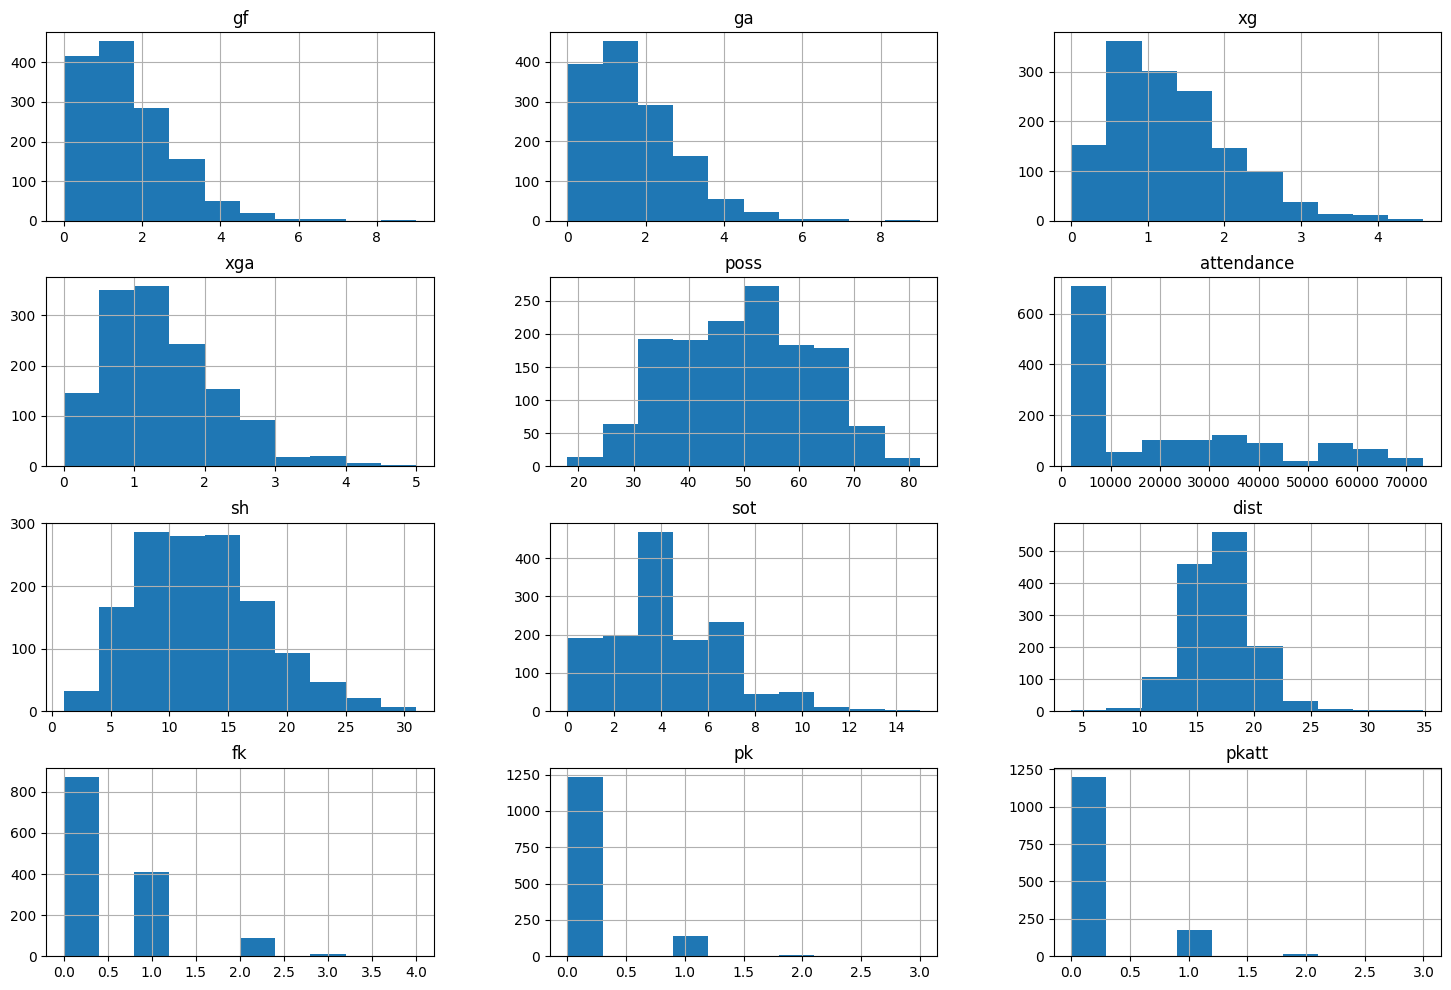

In [35]:
continuous_value = ['gf', 'ga', 'xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']

data[continuous_value].hist(figsize=(18, 12))

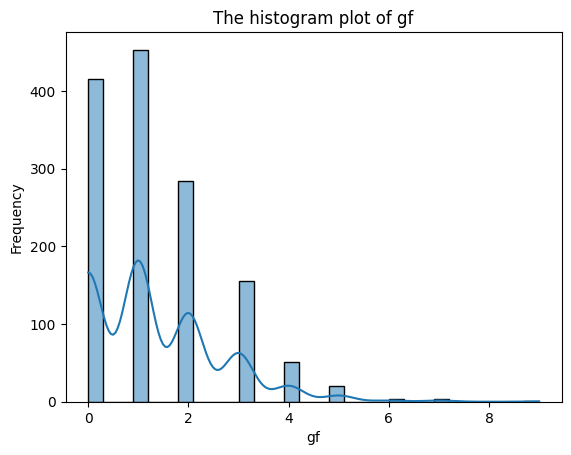

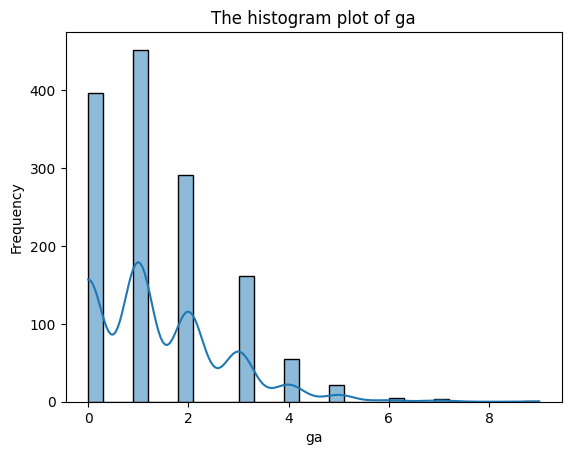

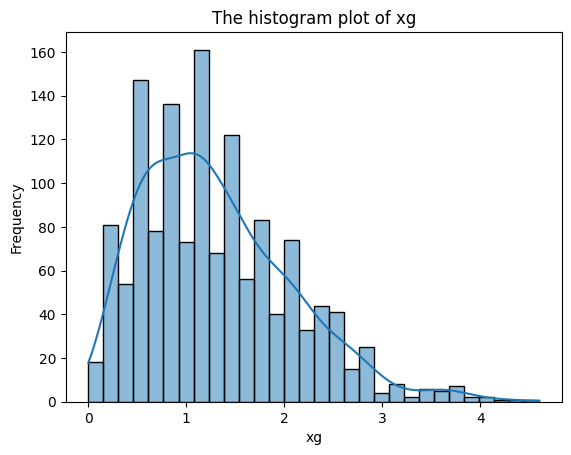

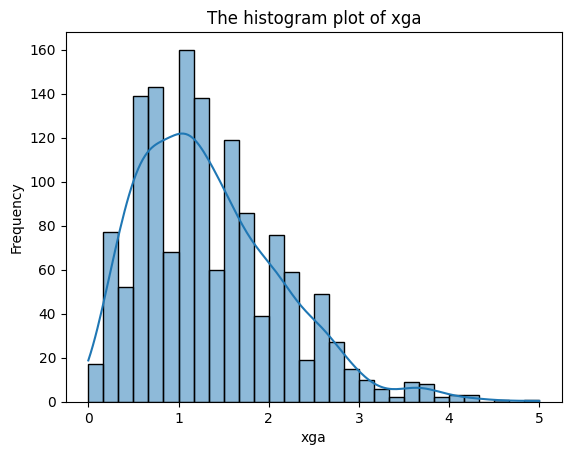

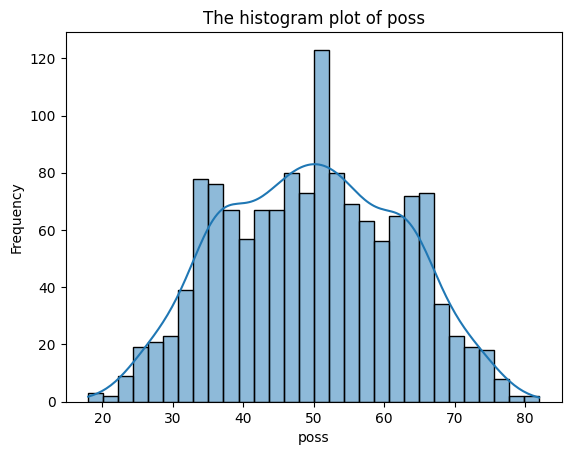

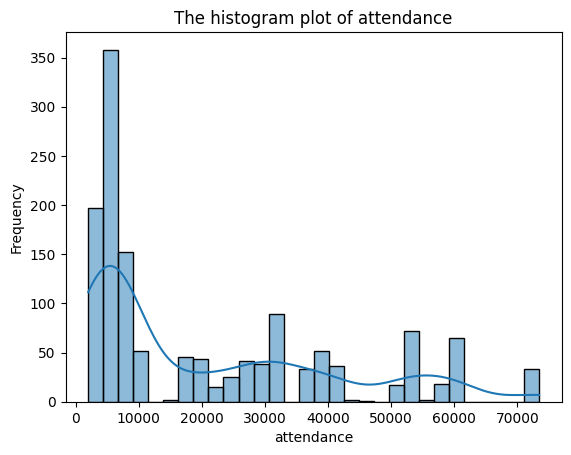

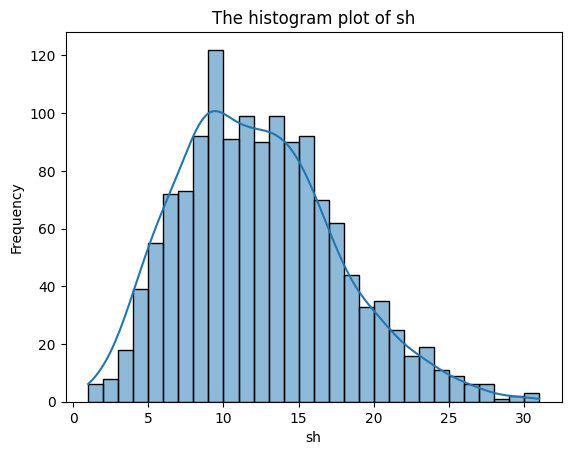

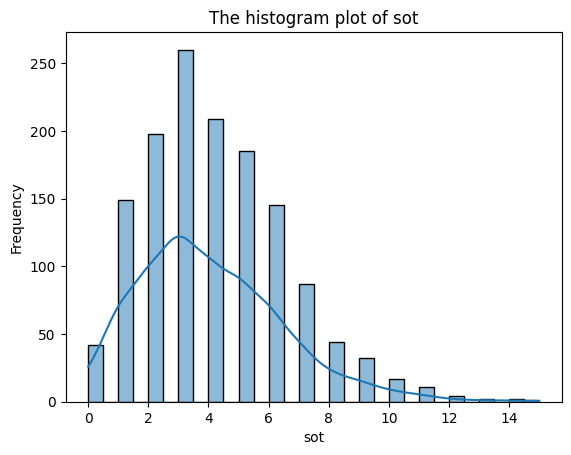

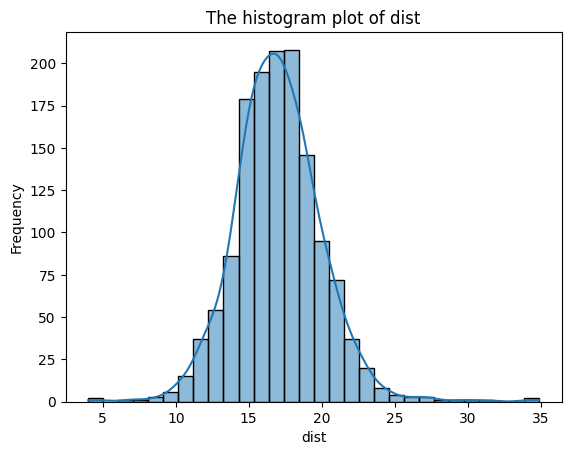

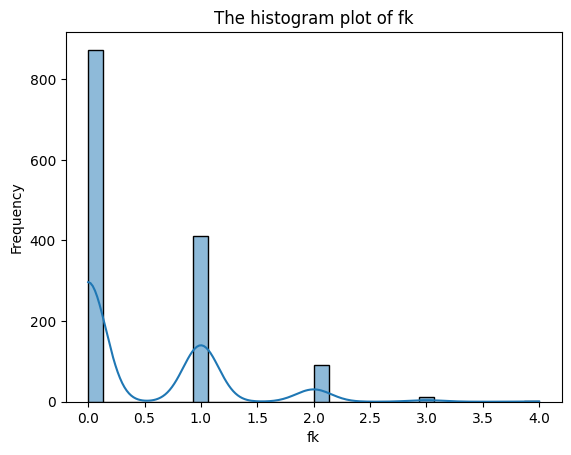

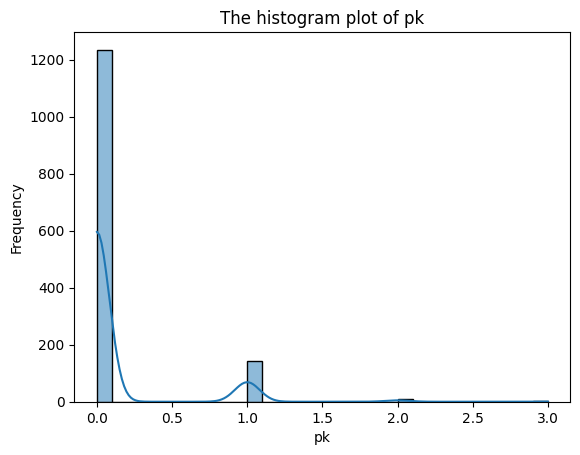

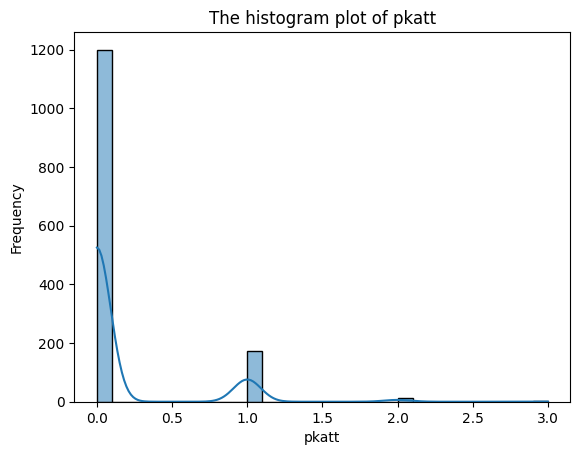

In [36]:
for i in continuous_value:
    sns.histplot(data[i], kde=True, bins=30)
    plt.xlabel(f'{i}')
    plt.ylabel('Frequency')
    plt.title(f'The histogram plot of {i}')
    plt.show()

In [37]:
# Winsorization
outliers_value = ['gf', 'ga', 'fk', 'pk', 'pkatt']
for i in outliers_value:
    lower_bound = data[i].quantile(0.05)
    upper_bound = data[i].quantile(0.95)
    data[i] = data[i].clip(lower_bound, upper_bound)

array([[<Axes: title={'center': 'gf'}>, <Axes: title={'center': 'ga'}>,
        <Axes: title={'center': 'xg'}>],
       [<Axes: title={'center': 'xga'}>,
        <Axes: title={'center': 'poss'}>,
        <Axes: title={'center': 'attendance'}>],
       [<Axes: title={'center': 'sh'}>, <Axes: title={'center': 'sot'}>,
        <Axes: title={'center': 'dist'}>],
       [<Axes: title={'center': 'fk'}>, <Axes: title={'center': 'pk'}>,
        <Axes: title={'center': 'pkatt'}>]], dtype=object)

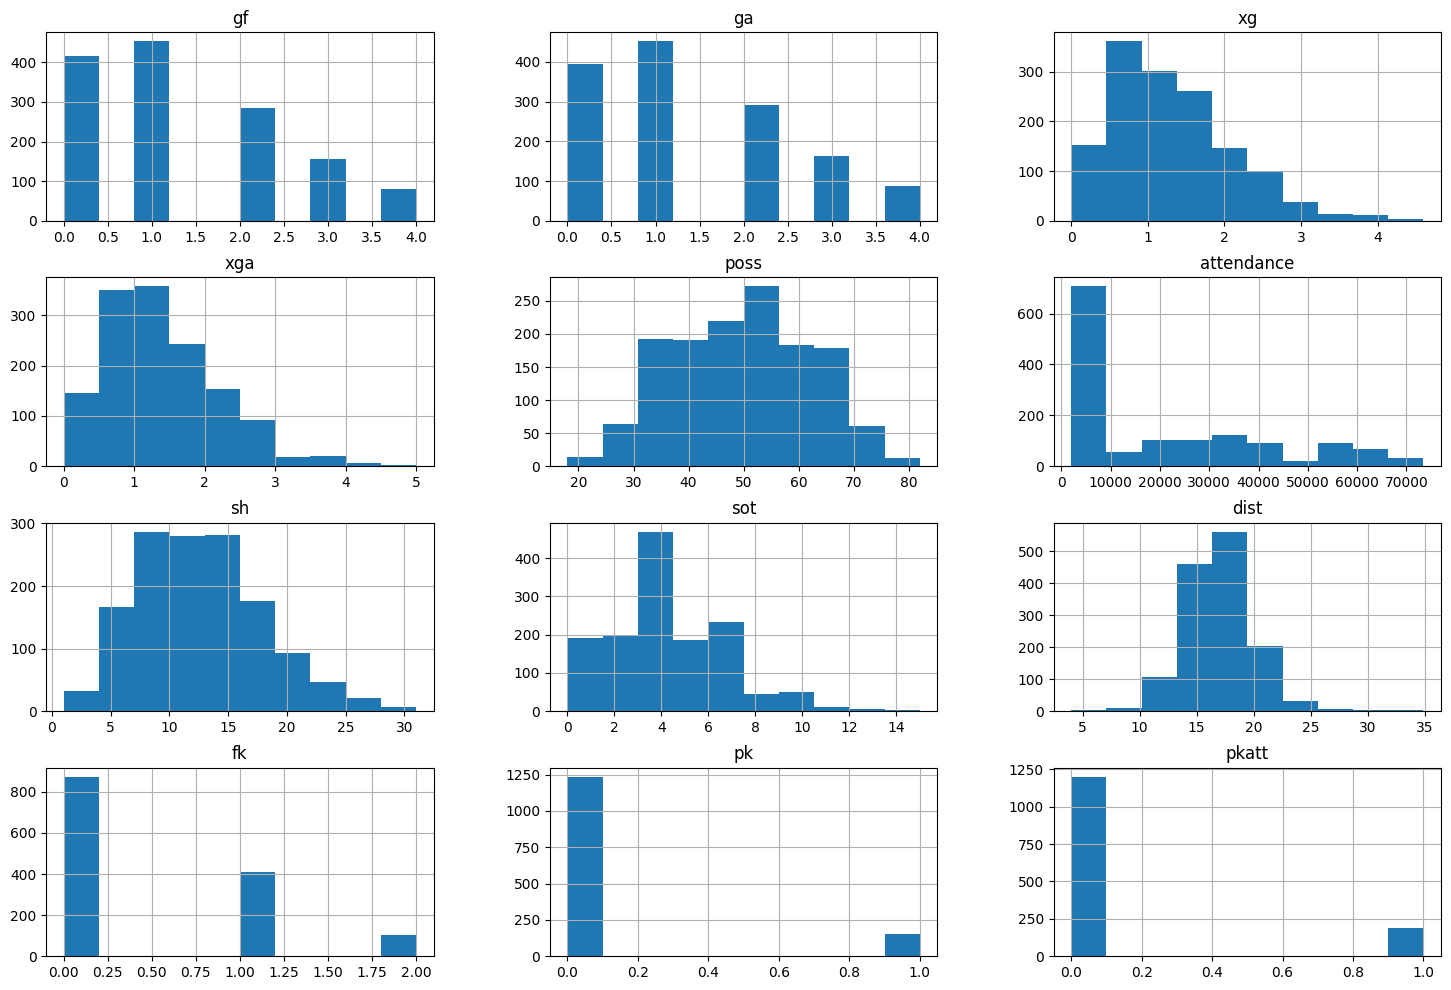

In [38]:
data[continuous_value].hist(figsize=(18, 12))

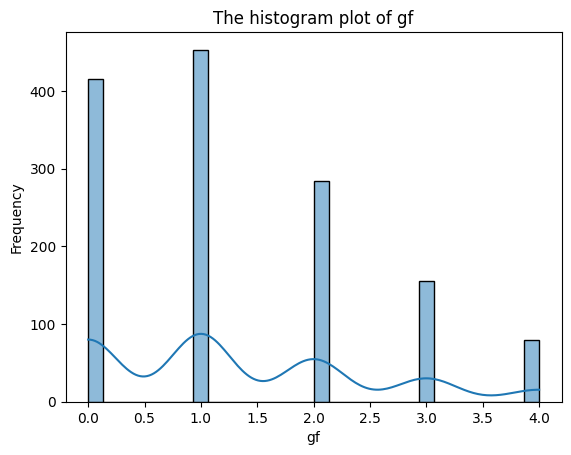

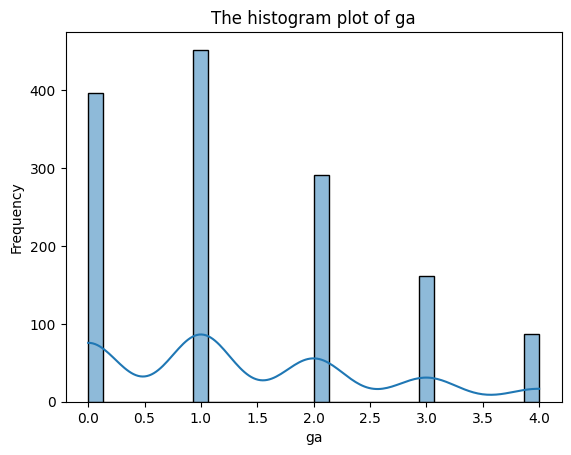

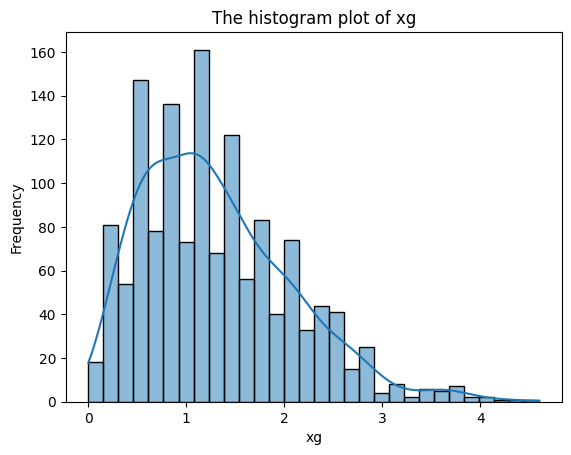

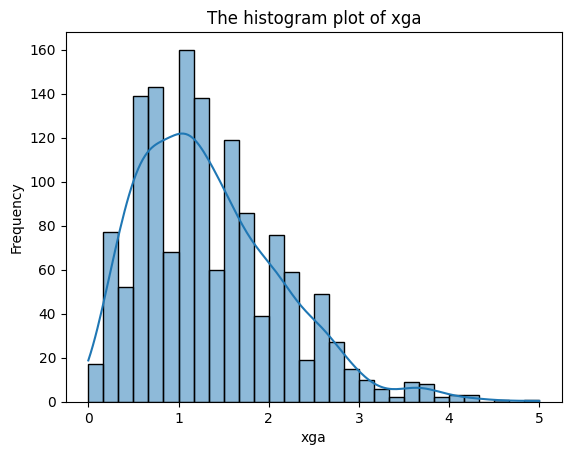

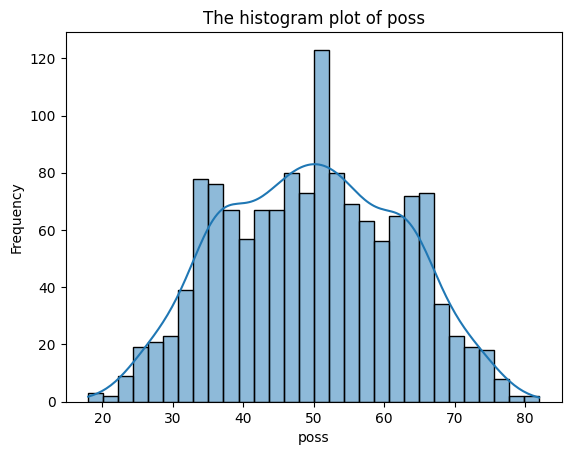

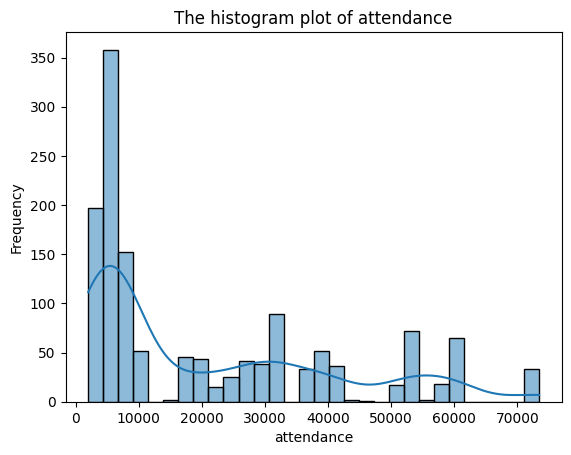

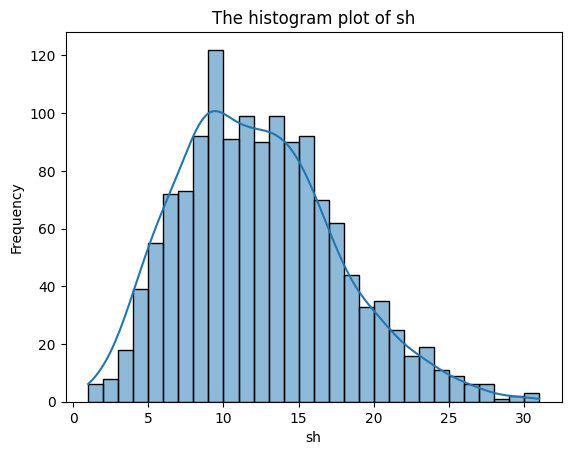

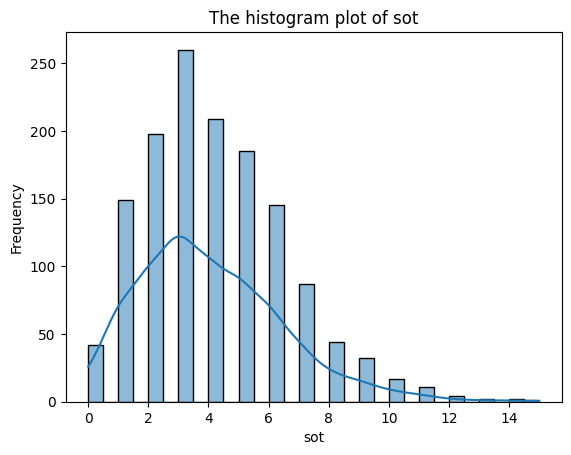

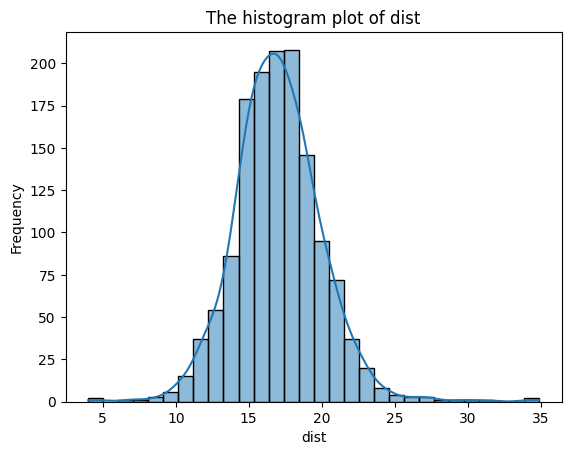

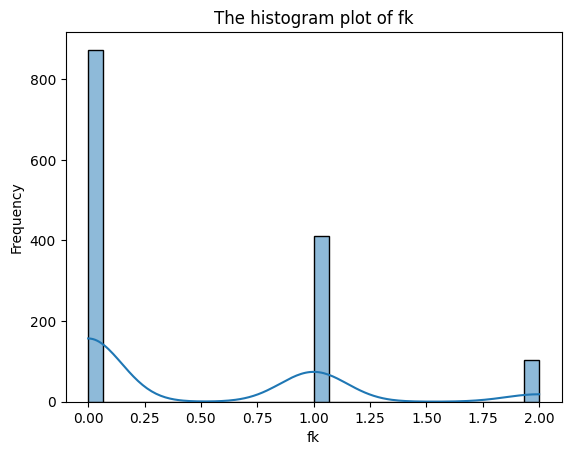

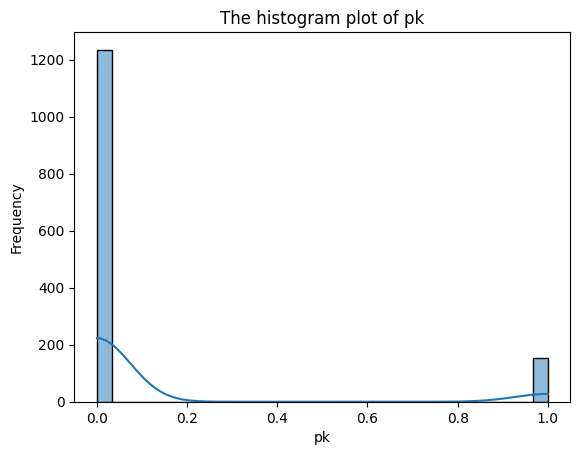

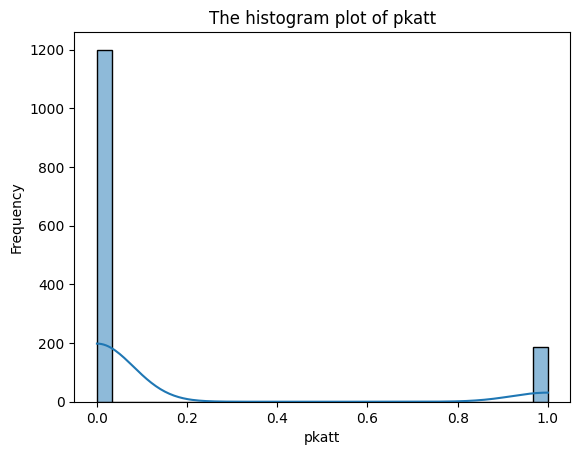

In [39]:
#After Winsorization
for i in continuous_value:
    sns.histplot(data[i], kde=True, bins=30)
    plt.xlabel(f'{i}')
    plt.ylabel('Frequency')
    plt.title(f'The histogram plot of {i}')
    plt.show()

#### Fixing Skewness

In [40]:
data[continuous_value].skew()

gf            0.665396
ga            0.630289
xg            0.862668
xga           0.900342
poss          0.012976
attendance    0.971962
sh            0.498075
sot           0.790668
dist          0.487451
fk            1.103363
pk            2.491826
pkatt         2.132950
dtype: float64

In [41]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson")
for i in continuous_value:
    data[i] = pt.fit_transform(data[[i]])

In [42]:
data[continuous_value].skew()

gf           -0.015702
ga           -0.024350
xg            0.007054
xga           0.006843
poss         -0.053932
attendance    0.008959
sh           -0.018029
sot          -0.015093
dist          0.086509
fk            0.556853
pk            2.491826
pkatt         2.132950
dtype: float64

array([[<Axes: title={'center': 'gf'}>, <Axes: title={'center': 'ga'}>,
        <Axes: title={'center': 'xg'}>],
       [<Axes: title={'center': 'xga'}>,
        <Axes: title={'center': 'poss'}>,
        <Axes: title={'center': 'attendance'}>],
       [<Axes: title={'center': 'sh'}>, <Axes: title={'center': 'sot'}>,
        <Axes: title={'center': 'dist'}>],
       [<Axes: title={'center': 'fk'}>, <Axes: title={'center': 'pk'}>,
        <Axes: title={'center': 'pkatt'}>]], dtype=object)

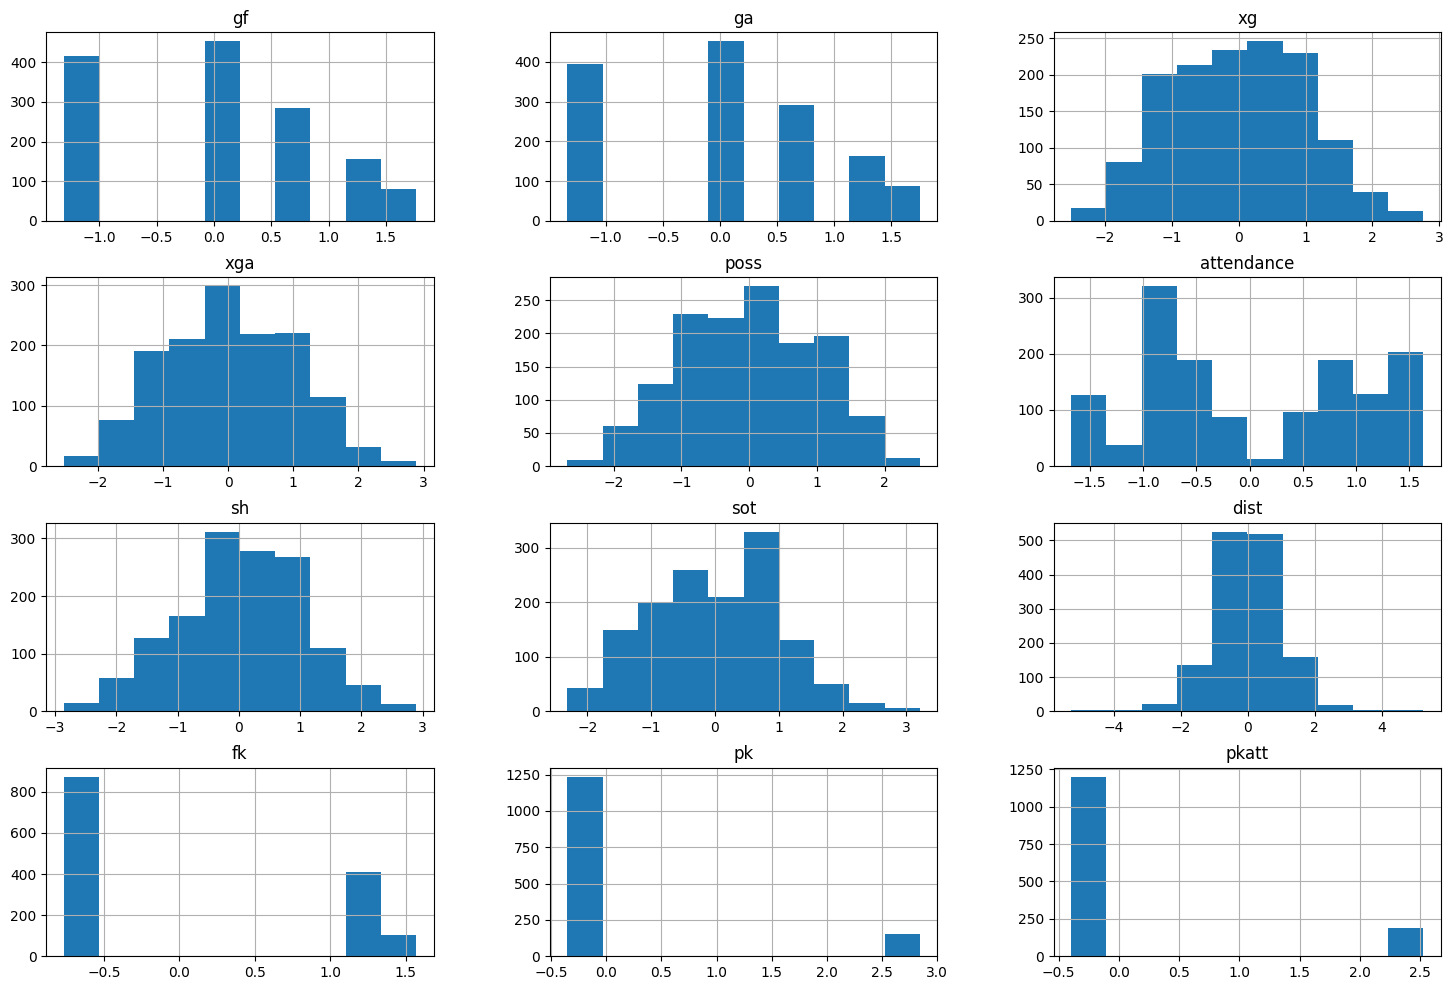

In [43]:
data[continuous_value].hist(figsize=(18, 12))

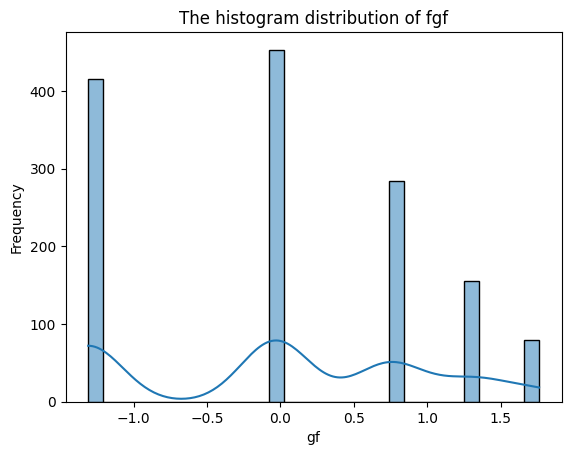

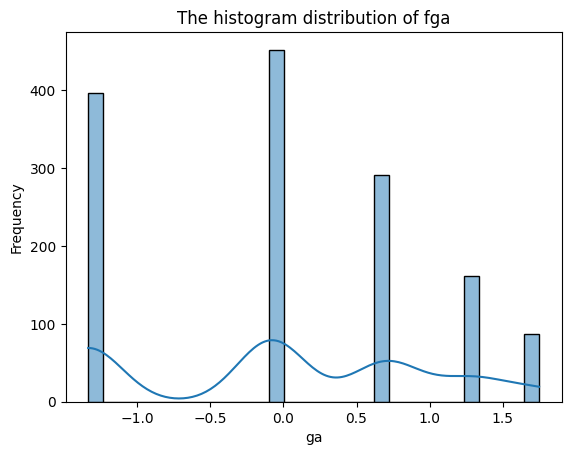

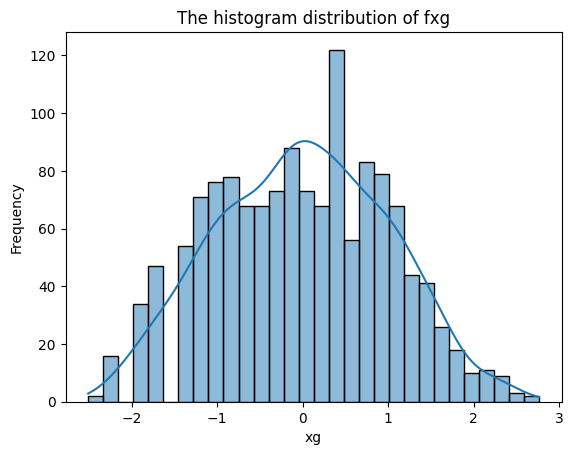

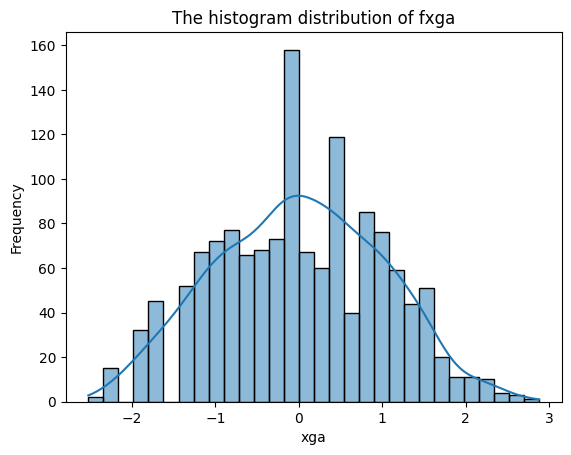

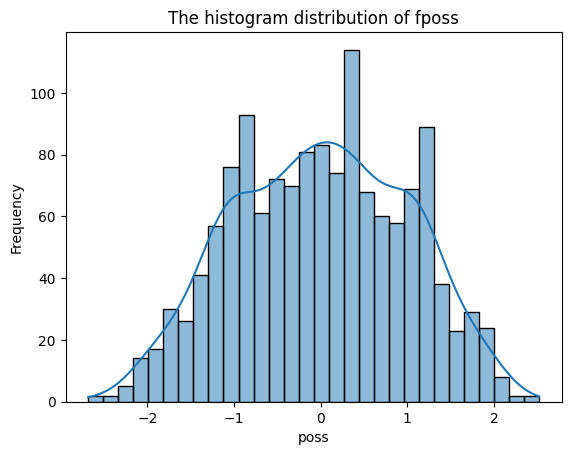

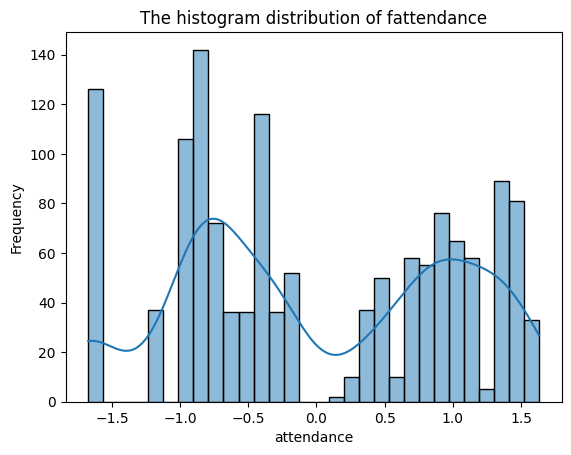

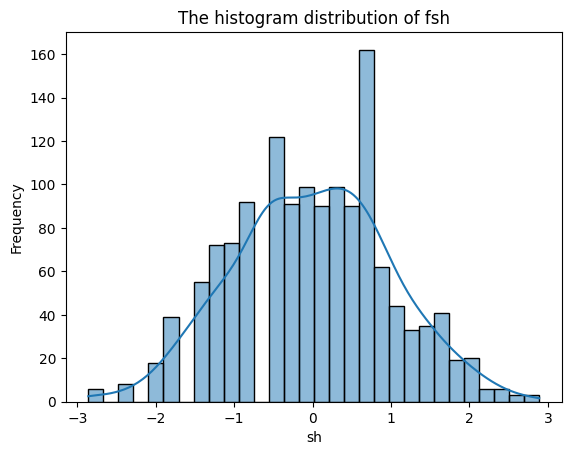

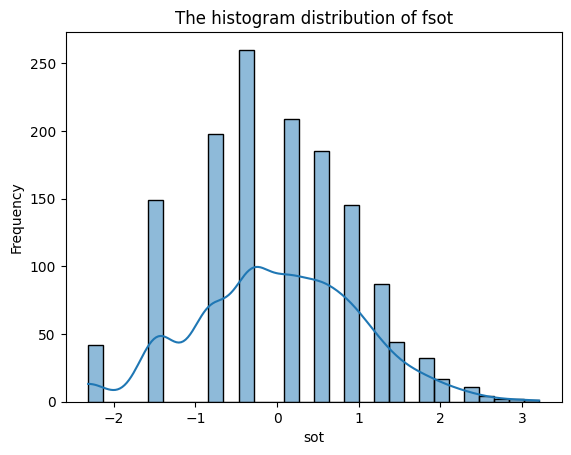

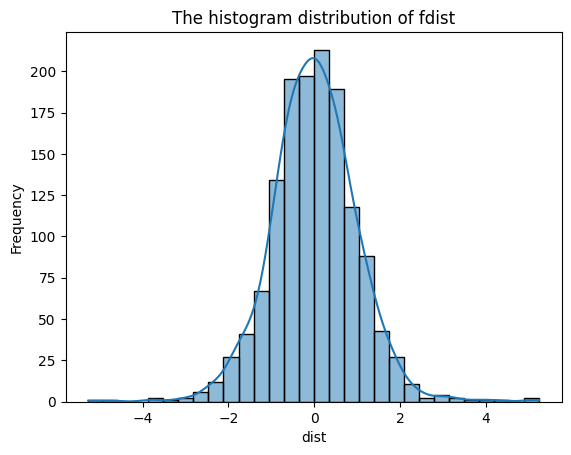

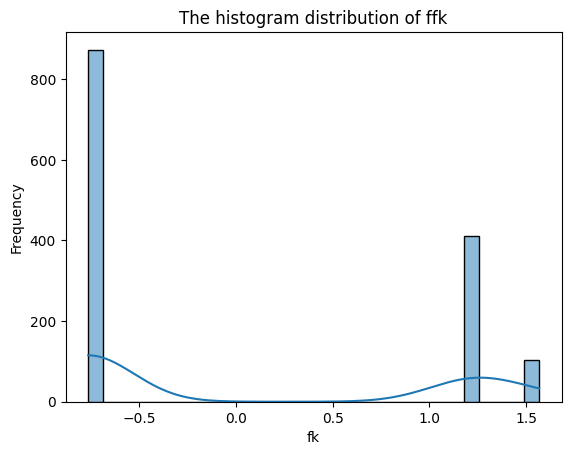

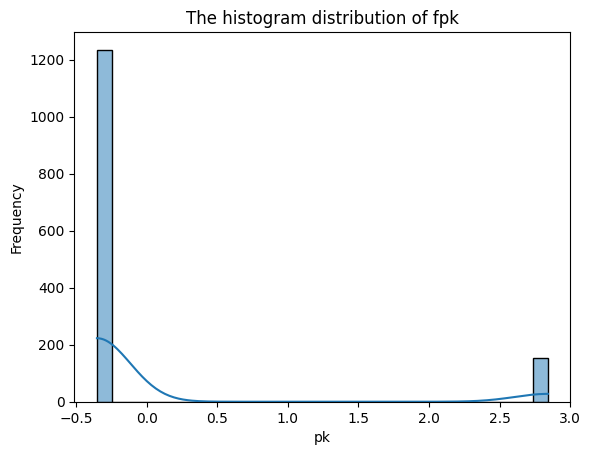

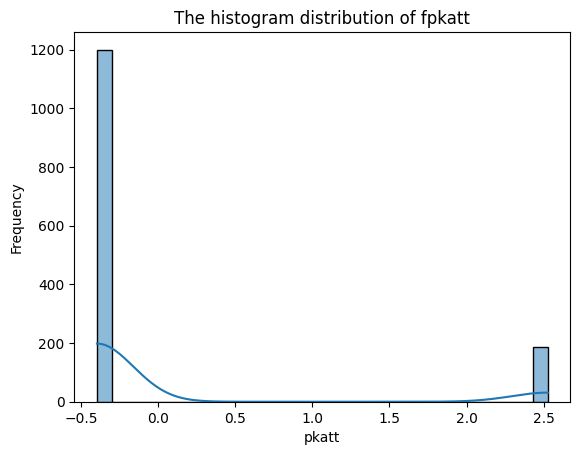

In [44]:
for i in continuous_value:
    sns.histplot(data[i], kde=True, bins=30)
    plt.xlabel(f'{i}')
    plt.ylabel("Frequency")
    plt.title(f"The histogram distribution of f{i}")
    plt.show()

#### EDA (Heatmap, Correlation)

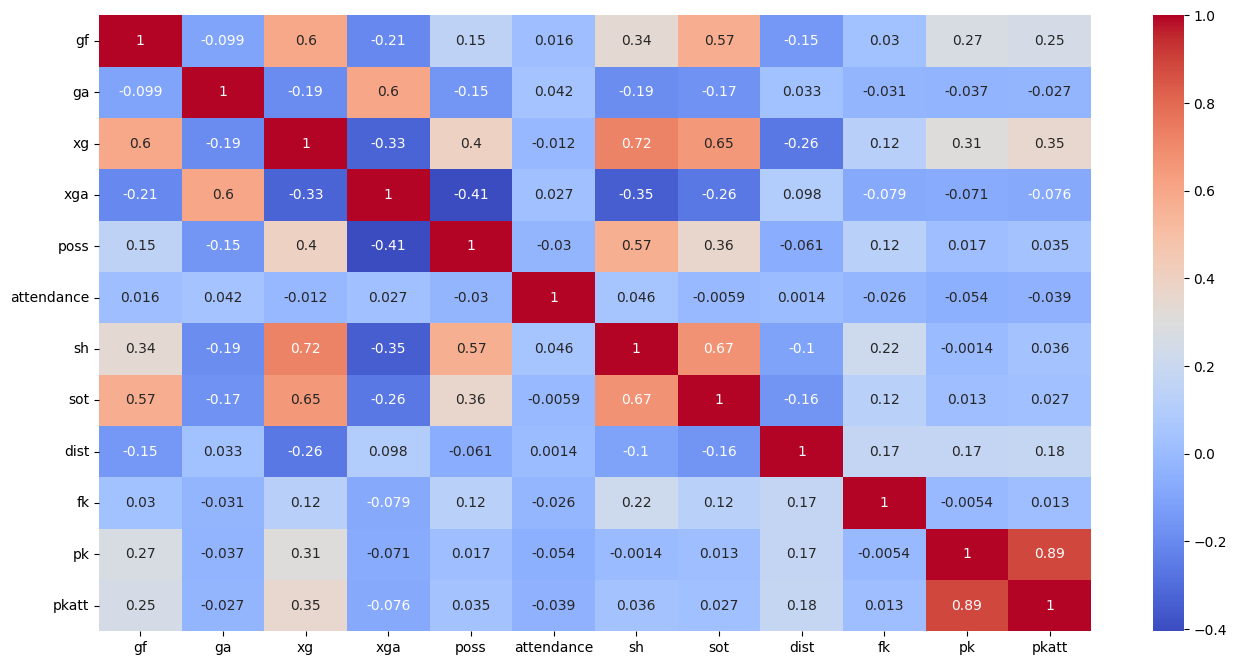

In [45]:
plt.figure(figsize=(16, 8))
sns.heatmap(data[continuous_value].corr(), annot=True, cmap="coolwarm")
plt.show()

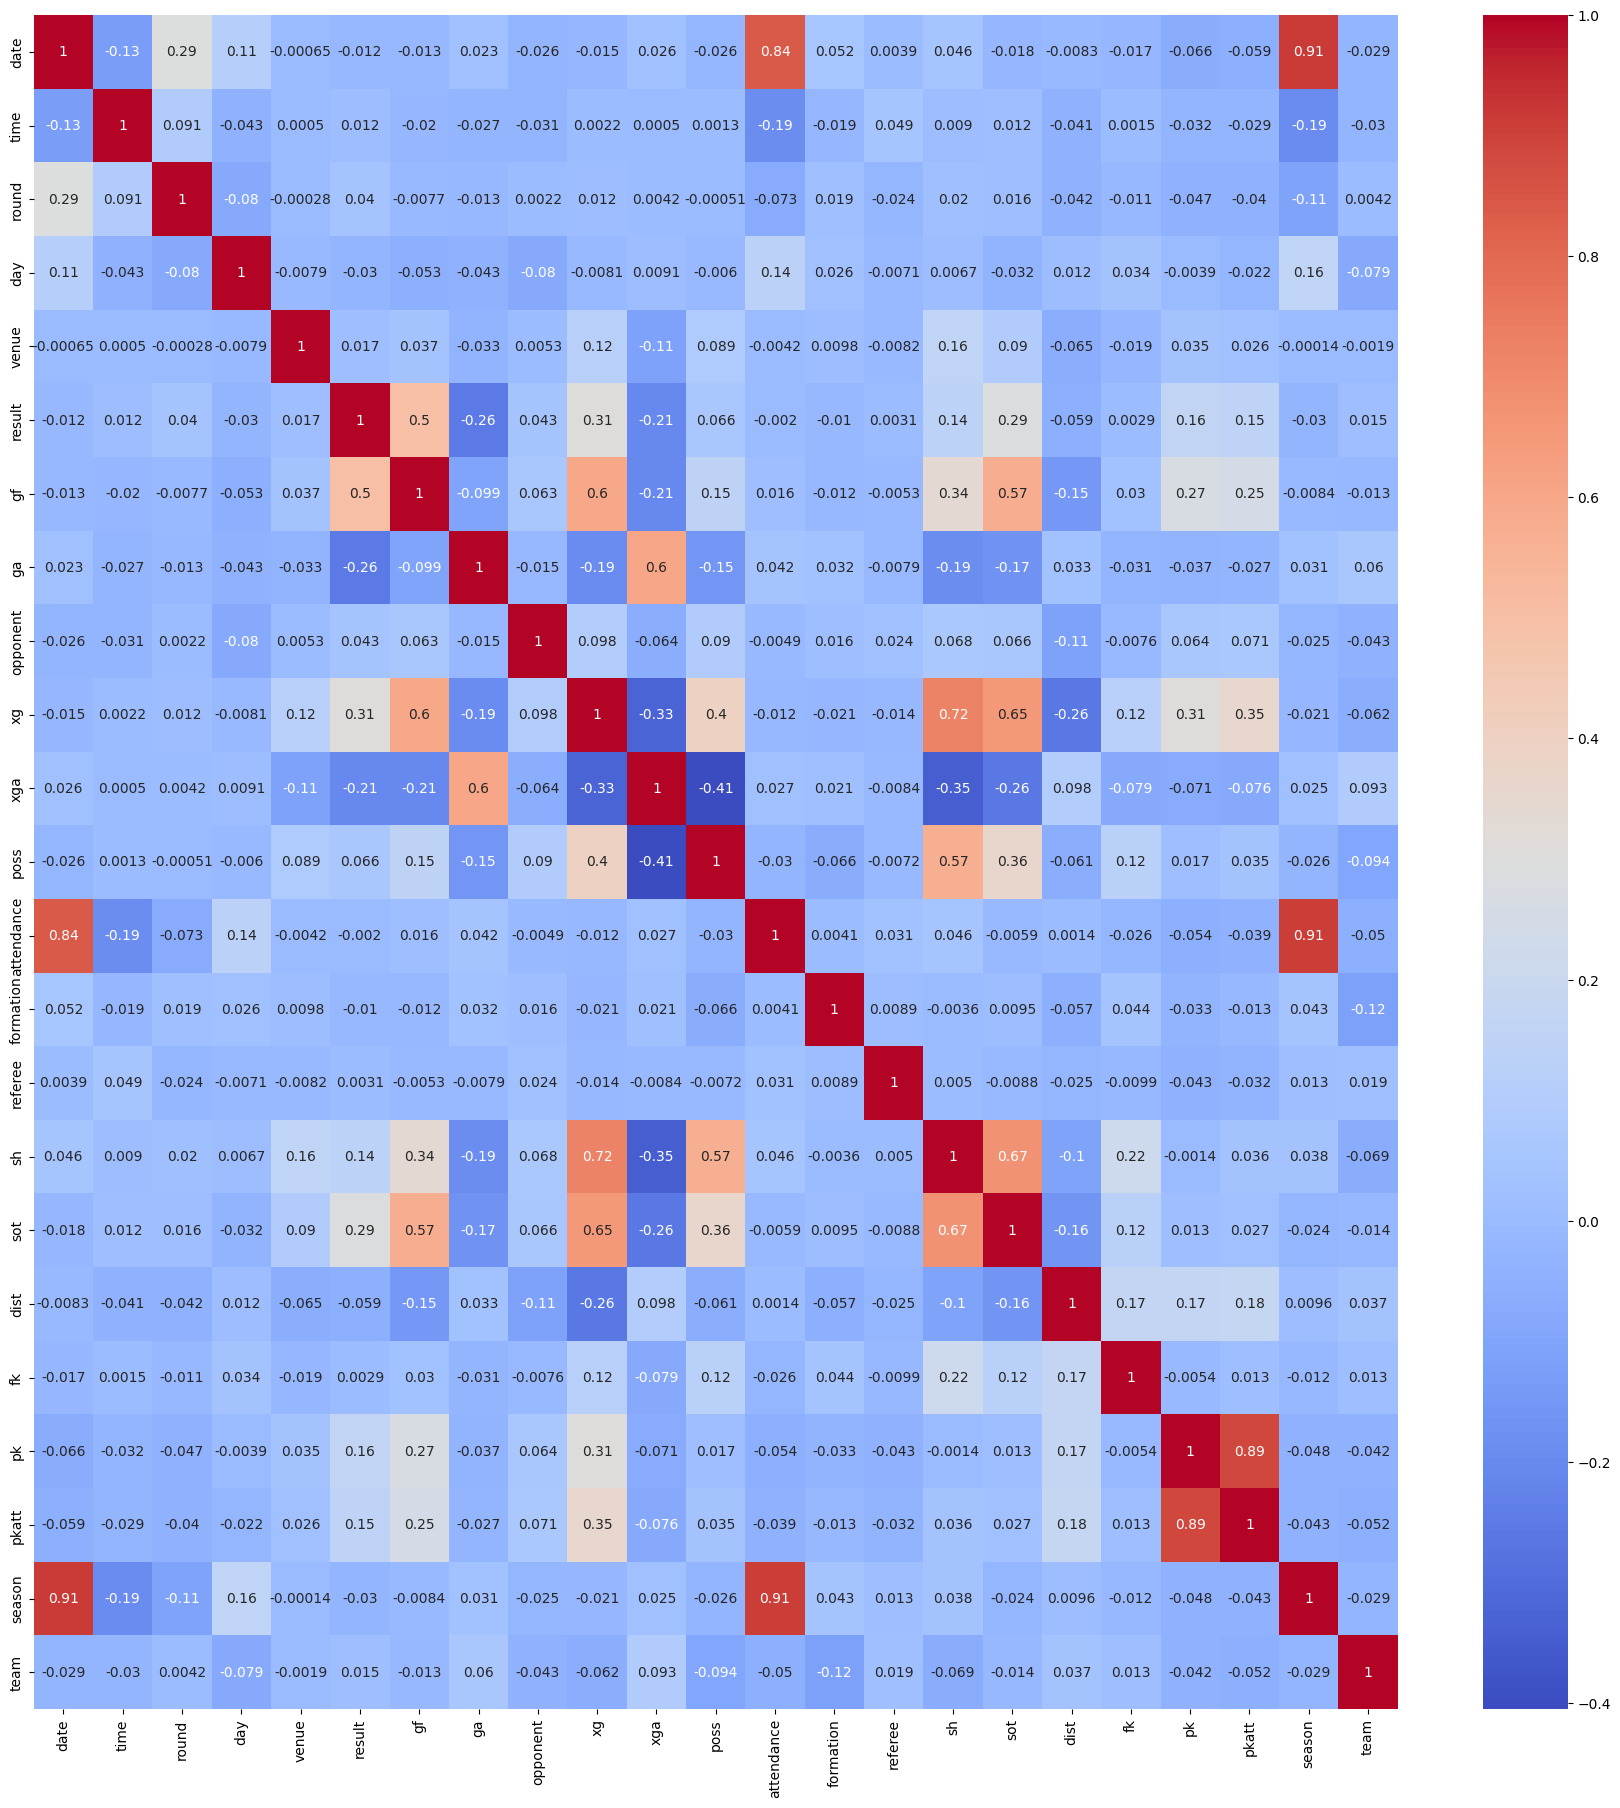

In [46]:
plt.figure(figsize=(22,22))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Features'] = data[continuous_value].columns
vif_data['VIF'] = [variance_inflation_factor(data[continuous_value].values, i) for i in range(data[continuous_value].shape[1])]
vif_data

,Features,VIF
0,gf,2.003322
1,ga,1.620317
2,xg,4.371196
3,xga,1.931719
4,poss,1.645809
5,attendance,1.021541
6,sh,3.772446
7,sot,2.545805
8,dist,1.327693
9,fk,1.099312


#### Scaling And Train_Test_Split

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 0 to 1388
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1388 non-null   datetime64[ns]
 1   time        1388 non-null   int64         
 2   round       1388 non-null   int64         
 3   day         1388 non-null   float64       
 4   venue       1388 non-null   int64         
 5   result      1388 non-null   int64         
 6   gf          1388 non-null   float64       
 7   ga          1388 non-null   float64       
 8   opponent    1388 non-null   int64         
 9   xg          1388 non-null   float64       
 10  xga         1388 non-null   float64       
 11  poss        1388 non-null   float64       
 12  attendance  1388 non-null   float64       
 13  formation   1388 non-null   int64         
 14  referee     1388 non-null   int64         
 15  sh          1388 non-null   float64       
 16  sot         1388 non-null   f

In [49]:
x = data.drop(['result', 'date'], axis=1)
y = data['result']
cat = ['round', 'day', 'venue', 'opponent', 'formation', 'referee', 'season', 'team', 'time']
cont = ['gf', 'ga', 'xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']
#Splitting The Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y, random_state=32)
#Separate Continuous And Categorical
X_train_cont = X_train[cont]
X_train_cat = X_train[cat]
X_test_cont = X_test[cont]
X_test_cat = X_test[cat]
#Scaling The Dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_cont = pd.DataFrame(scaler.fit_transform(X_train_cont), columns=cont, index=X_train_cont.index)
X_test_cont = pd.DataFrame(scaler.transform(X_test_cont), columns=cont, index=X_test_cont.index)

#Merge
X_train = pd.concat([X_train_cat, X_train_cont], axis=1)
X_test = pd.concat([X_test_cat, X_test_cont], axis=1)

In [50]:
y_test.value_counts()

result
1    110
2    105
0     63
Name: count, dtype: int64

#### Initial Training 

In [51]:
from sklearn.ensemble import RandomForestClassifier
import time
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=15)
start_time = time.time()
rfc.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time
print(f"Total Training Time Elapsed: {total_time:.2f}")

Total Training Time Elapsed: 0.31


In [52]:
y_predict = rfc.predict(X_test)
rfc_predictions = pd.DataFrame({"Actual_Values": y_test, "Predicted_Values": y_predict})
rfc_predictions.head(20)

,Actual_Values,Predicted_Values
529,2,2
305,0,0
927,1,1
215,2,2
1135,0,0
689,0,2
1227,2,2
4,0,0
424,1,1
557,2,2


#### Evaluation of the training

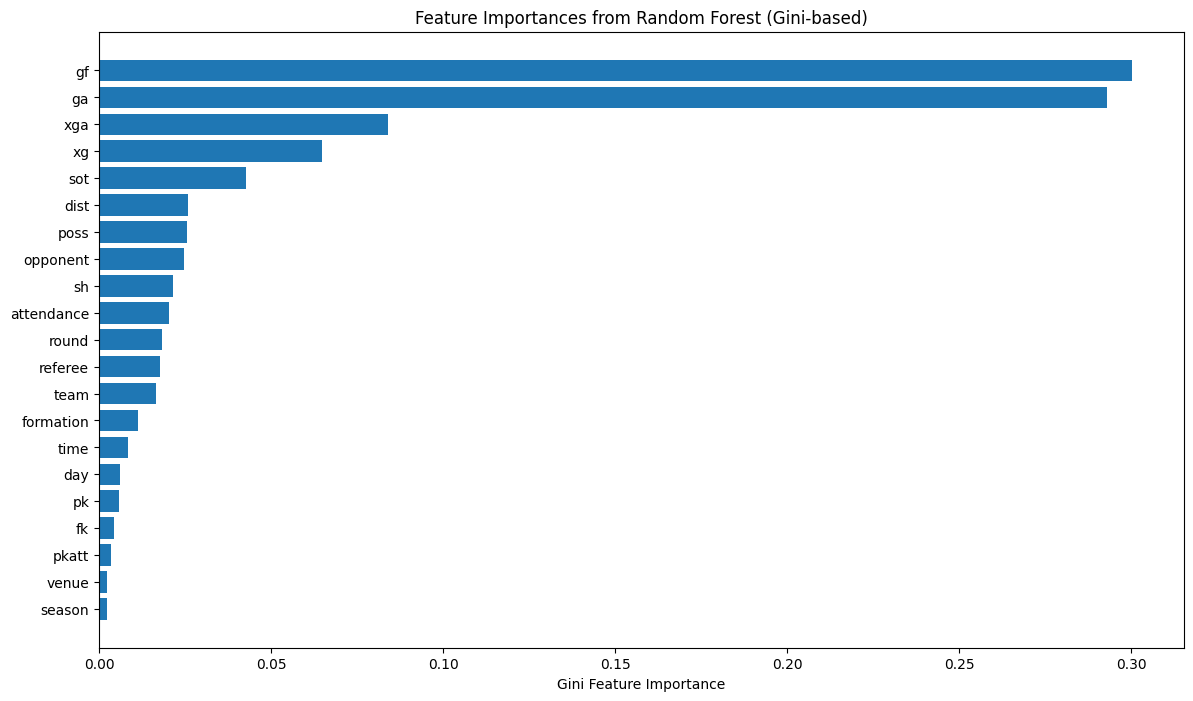

In [53]:
importances = rfc.feature_importances_
indices = np.argsort(importances)
feature_names = X_train.columns

plt.figure(figsize=(14, 8))
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), np.array(feature_names)[indices])
plt.xlabel("Gini Feature Importance")
plt.title("Feature Importances from Random Forest (Gini-based)")
plt.show()

In [54]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
precision = precision_score(y_test, y_predict, average="weighted")
recall = recall_score(y_test, y_predict, average="weighted")
accuracy = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average="weighted")
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["D", "L", "W"])

In [55]:
precision

0.9539908613649621

In [56]:
recall

0.9532374100719424

In [57]:
accuracy

0.9532374100719424

In [58]:
f1

0.9526139269579811

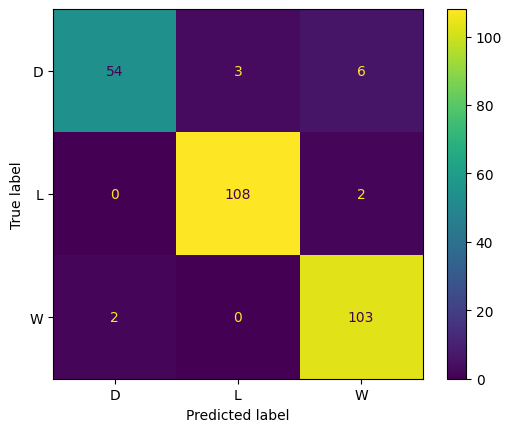

In [59]:
disp.plot()

### Rolling Averages (Best For Time Series Analysis)

##### Finding The Rolling Averages

In [60]:
grouped_data = data.groupby("team")
mancity_grouped = grouped_data.get_group(12)
mancity_grouped

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team
0,2021-08-15,16,1,1.0,0,1,-1.309366,-0.080190,18,0.877041,...,10,2,1.096673,0.124586,-0.006755,1.229985,-0.351975,-0.395811,2022,12
1,2021-08-21,15,2,7.0,1,2,1.762366,-1.336149,15,1.593311,...,10,7,0.773512,0.124586,0.126959,1.229985,-0.351975,-0.395811,2022,12
2,2021-08-28,12,3,7.0,1,2,1.762366,-1.336149,0,2.335966,...,10,13,2.116171,2.049739,-0.904470,-0.765455,-0.351975,-0.395811,2022,12
3,2021-09-11,15,4,7.0,0,2,-0.032193,-1.336149,10,1.745379,...,10,17,2.116171,1.499166,-1.011543,-0.765455,-0.351975,-0.395811,2022,12
4,2021-09-18,15,5,7.0,1,0,-1.309366,-1.336149,17,-0.104491,...,10,10,0.773512,-1.454335,-0.414664,1.229985,-0.351975,-0.395811,2022,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,2021-05-01,12,34,7.0,0,2,0.746576,-1.336149,6,1.075188,...,12,6,1.403986,-0.316290,-0.727717,1.229985,-0.351975,-0.395811,2021,12
663,2021-05-08,17,35,7.0,1,1,-0.032193,0.704524,5,1.168966,...,4,2,0.605133,-0.316290,0.683654,-0.765455,-0.351975,2.526456,2021,12
664,2021-05-14,20,36,6.0,0,2,1.762366,1.284957,14,0.175974,...,10,11,0.605133,0.870656,0.683654,1.229985,-0.351975,-0.395811,2021,12
665,2021-05-18,19,37,3.0,0,1,0.746576,1.284957,3,-0.256166,...,10,21,-0.752927,0.124586,-1.300998,1.229985,-0.351975,-0.395811,2021,12


In [61]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [62]:
cols = ['gf', 'ga', 'xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']
new_cols = [f"{c}_rolling" for c in cols]
new_cols

['gf_rolling',
 'ga_rolling',
 'xg_rolling',
 'xga_rolling',
 'poss_rolling',
 'attendance_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [63]:
rolling_grouped_data = grouped_data.apply(lambda x: rolling_averages(x, cols, new_cols))
rolling_grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1319 entries, (np.int64(0), np.int64(898)) to (np.int64(22), np.int64(231))
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1319 non-null   datetime64[ns]
 1   time                1319 non-null   int64         
 2   round               1319 non-null   int64         
 3   day                 1319 non-null   float64       
 4   venue               1319 non-null   int64         
 5   result              1319 non-null   int64         
 6   gf                  1319 non-null   float64       
 7   ga                  1319 non-null   float64       
 8   opponent            1319 non-null   int64         
 9   xg                  1319 non-null   float64       
 10  xga                 1319 non-null   float64       
 11  poss                1319 non-null   float64       
 12  attendance          1319 non-null   float64       
 

C:\Users\shubh\AppData\Local\Temp\ipykernel_20560\2935958715.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rolling_grouped_data = grouped_data.apply(lambda x: rolling_averages(x, cols, new_cols))


In [64]:
rolling_grouped_data = rolling_grouped_data.droplevel('team')
rolling_grouped_data

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,xg_rolling,xga_rolling,poss_rolling,attendance_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
898,2020-10-04,14,4,1.0,1,2,0.746576,-0.080190,16,-1.392128,...,0.372534,0.268375,0.022505,-0.963332,-0.917687,-0.038848,-0.753855,0.012314,-0.351975,-0.395811
899,2020-10-17,17,5,7.0,0,1,-1.309366,-0.080190,12,-0.416575,...,-0.348891,0.268375,0.232017,-0.963332,-1.411633,-0.038848,-0.393349,-0.765455,-0.351975,-0.395811
900,2020-10-25,19,6,1.0,1,1,-1.309366,-0.080190,10,-0.416575,...,-0.589798,0.121012,-0.328582,-0.963332,-1.043521,-0.038848,-0.067697,0.012314,-0.351975,-0.395811
901,2020-11-01,16,7,1.0,0,2,-0.032193,-1.336149,13,-0.104491,...,-0.741760,-0.511882,0.324248,-0.963332,-0.428963,0.108111,-0.317026,0.677461,-0.351975,-0.395811
902,2020-11-08,19,8,1.0,1,1,-1.309366,1.284957,1,0.430385,...,-0.312547,-0.424733,-0.098914,-0.963332,-0.428963,-0.548680,0.320438,0.677461,0.712386,0.578278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2022-03-13,14,29,1.0,0,2,-0.032193,-1.336149,7,-0.586723,...,-0.723972,0.676418,1.041284,1.048767,0.124676,-0.140754,0.778270,-0.765455,-0.351975,-0.395811
228,2022-03-18,20,30,6.0,1,1,0.746576,1.284957,9,-0.586723,...,-0.723972,-0.064048,1.041284,0.921590,0.124676,0.238595,0.872806,-0.765455,-0.351975,-0.395811
229,2022-04-02,15,31,7.0,1,2,0.746576,-0.080190,1,0.039309,...,-0.530007,-0.177786,0.618122,0.925835,0.246132,0.566304,0.946333,-0.765455,-0.351975,-0.395811
230,2022-04-08,20,32,6.0,0,1,-1.309366,-0.080190,14,-1.634262,...,-0.378045,0.314440,0.196996,0.939249,0.246132,0.435820,0.503529,-0.765455,-0.351975,-0.395811


In [65]:
rolling_grouped_data.index = range(rolling_grouped_data.shape[0])
rolling_grouped_data

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,xg_rolling,xga_rolling,poss_rolling,attendance_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2020-10-04,14,4,1.0,1,2,0.746576,-0.080190,16,-1.392128,...,0.372534,0.268375,0.022505,-0.963332,-0.917687,-0.038848,-0.753855,0.012314,-0.351975,-0.395811
1,2020-10-17,17,5,7.0,0,1,-1.309366,-0.080190,12,-0.416575,...,-0.348891,0.268375,0.232017,-0.963332,-1.411633,-0.038848,-0.393349,-0.765455,-0.351975,-0.395811
2,2020-10-25,19,6,1.0,1,1,-1.309366,-0.080190,10,-0.416575,...,-0.589798,0.121012,-0.328582,-0.963332,-1.043521,-0.038848,-0.067697,0.012314,-0.351975,-0.395811
3,2020-11-01,16,7,1.0,0,2,-0.032193,-1.336149,13,-0.104491,...,-0.741760,-0.511882,0.324248,-0.963332,-0.428963,0.108111,-0.317026,0.677461,-0.351975,-0.395811
4,2020-11-08,19,8,1.0,1,1,-1.309366,1.284957,1,0.430385,...,-0.312547,-0.424733,-0.098914,-0.963332,-0.428963,-0.548680,0.320438,0.677461,0.712386,0.578278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2022-03-13,14,29,1.0,0,2,-0.032193,-1.336149,7,-0.586723,...,-0.723972,0.676418,1.041284,1.048767,0.124676,-0.140754,0.778270,-0.765455,-0.351975,-0.395811
1315,2022-03-18,20,30,6.0,1,1,0.746576,1.284957,9,-0.586723,...,-0.723972,-0.064048,1.041284,0.921590,0.124676,0.238595,0.872806,-0.765455,-0.351975,-0.395811
1316,2022-04-02,15,31,7.0,1,2,0.746576,-0.080190,1,0.039309,...,-0.530007,-0.177786,0.618122,0.925835,0.246132,0.566304,0.946333,-0.765455,-0.351975,-0.395811
1317,2022-04-08,20,32,6.0,0,1,-1.309366,-0.080190,14,-1.634262,...,-0.378045,0.314440,0.196996,0.939249,0.246132,0.435820,0.503529,-0.765455,-0.351975,-0.395811


##### 1. Removing Outliers.

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'round'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'venue'}>,
        <Axes: title={'center': 'result'}>],
       [<Axes: title={'center': 'gf'}>, <Axes: title={'center': 'ga'}>,
        <Axes: title={'center': 'opponent'}>,
        <Axes: title={'center': 'xg'}>, <Axes: title={'center': 'xga'}>,
        <Axes: title={'center': 'poss'}>],
       [<Axes: title={'center': 'attendance'}>,
        <Axes: title={'center': 'formation'}>,
        <Axes: title={'center': 'referee'}>,
        <Axes: title={'center': 'sh'}>, <Axes: title={'center': 'sot'}>,
        <Axes: title={'center': 'dist'}>],
       [<Axes: title={'center': 'fk'}>, <Axes: title={'center': 'pk'}>,
        <Axes: title={'center': 'pkatt'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'team'}>,
        <Axes: title={'center': 'gf_rolling'}>],
    

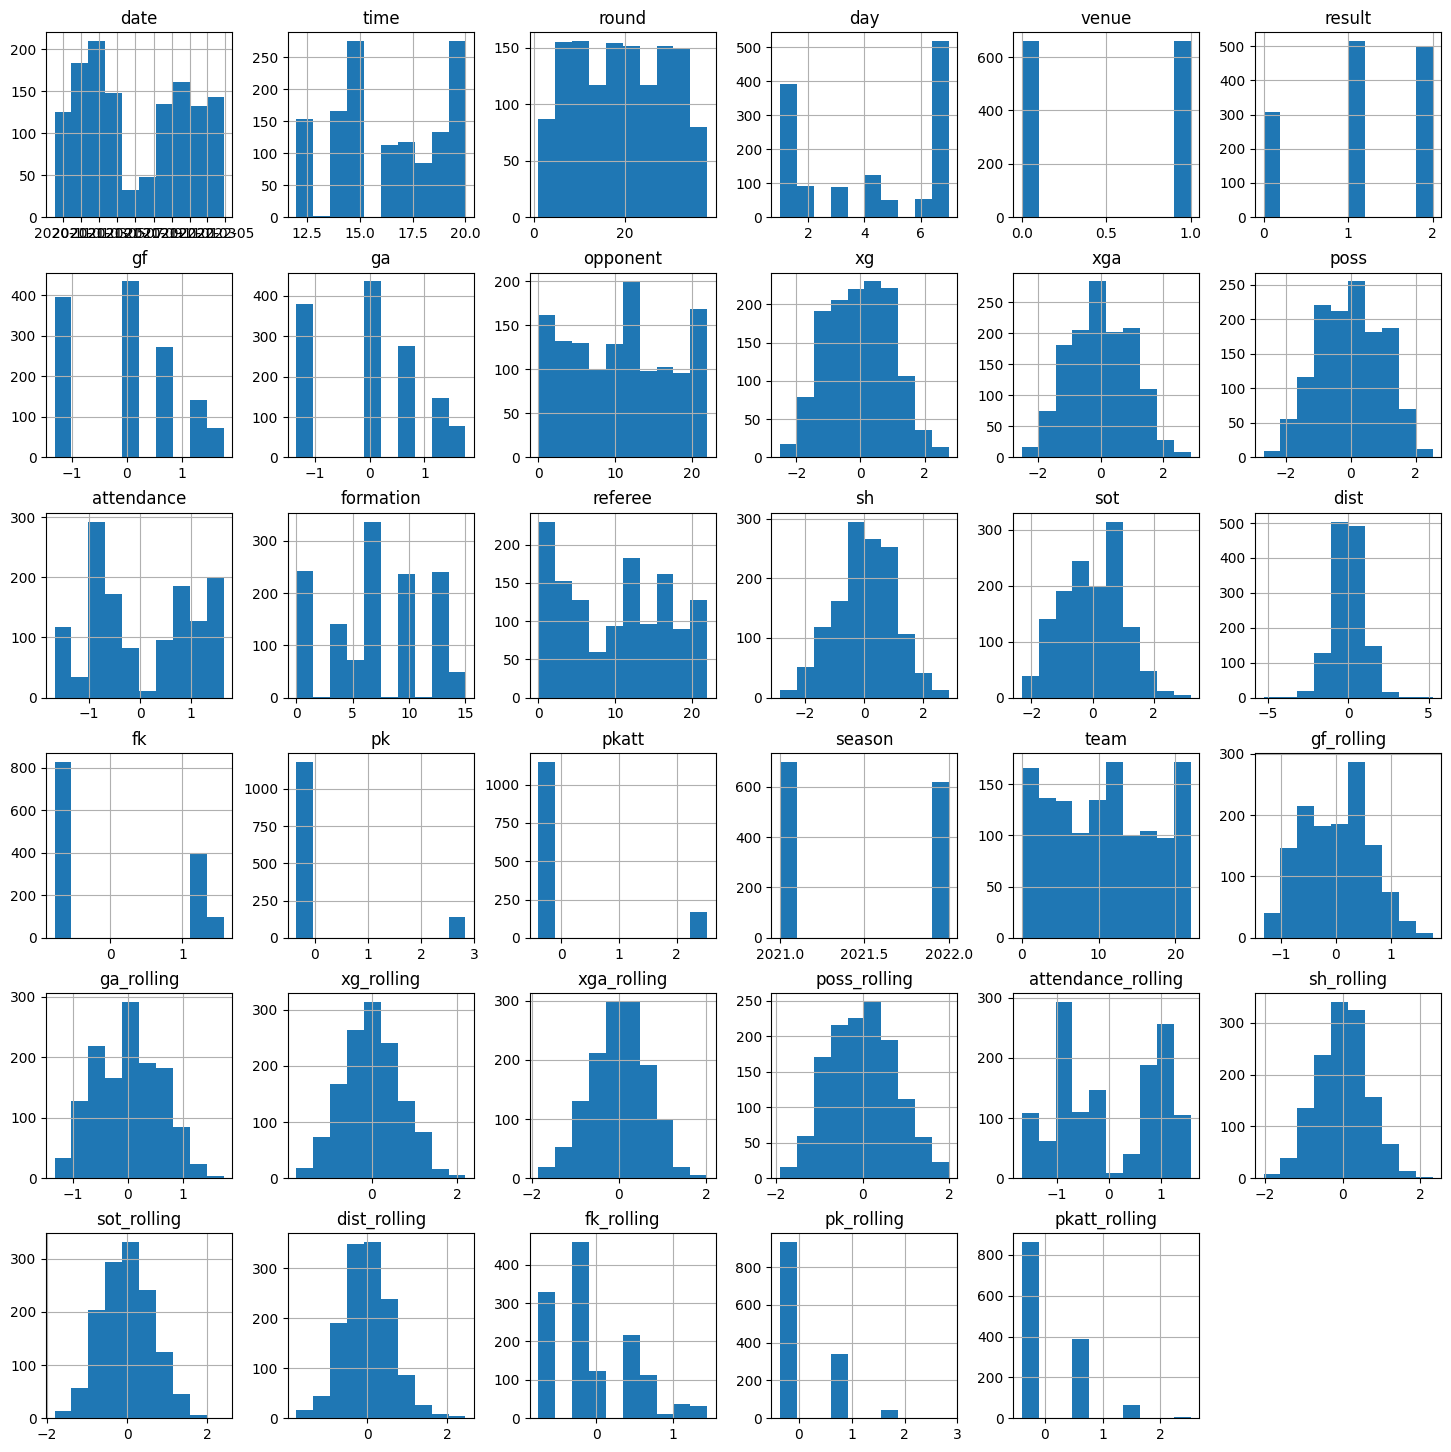

In [66]:
rolling_grouped_data.hist(figsize=(18,18))

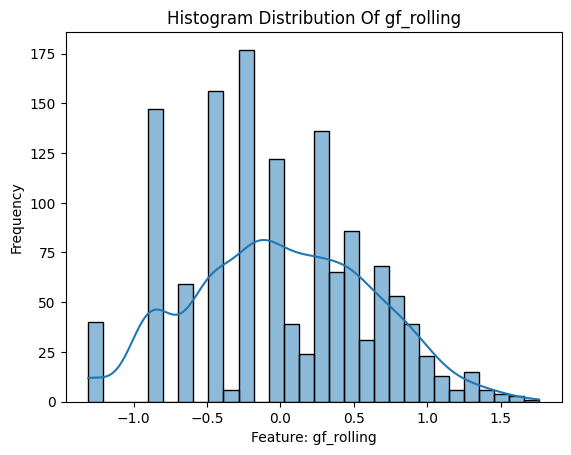

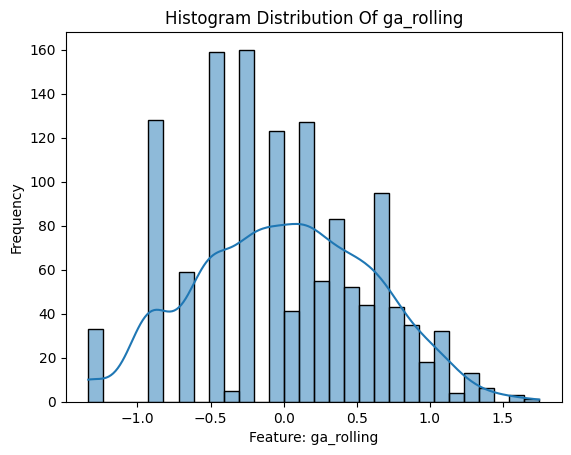

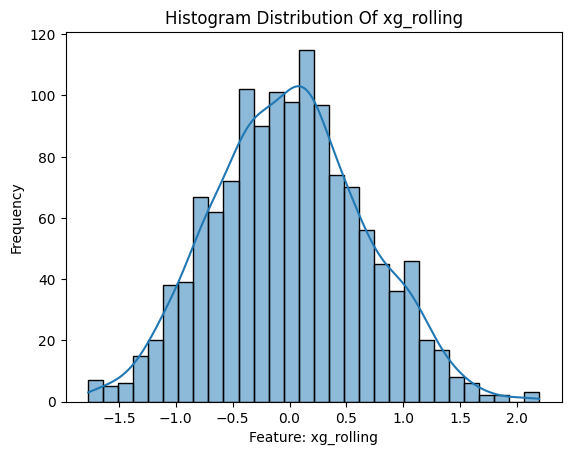

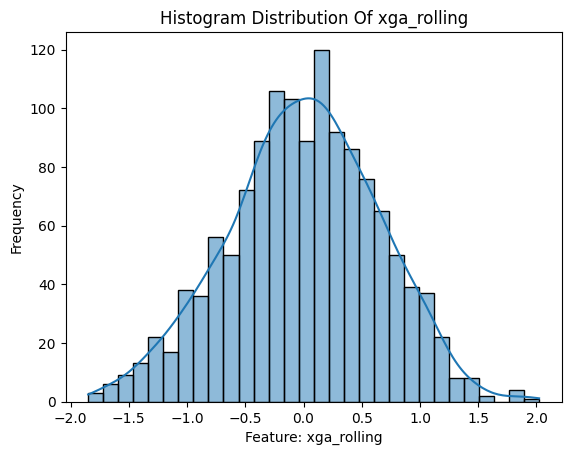

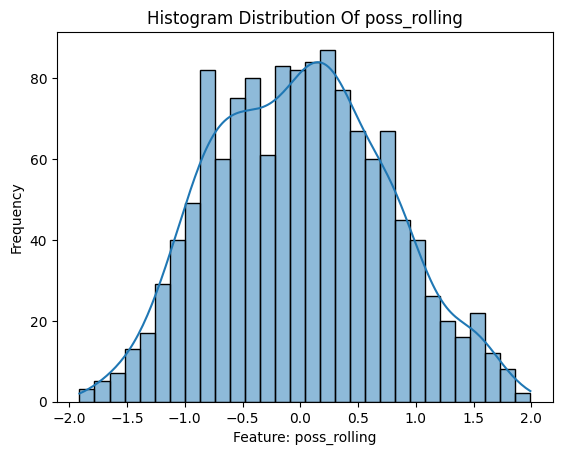

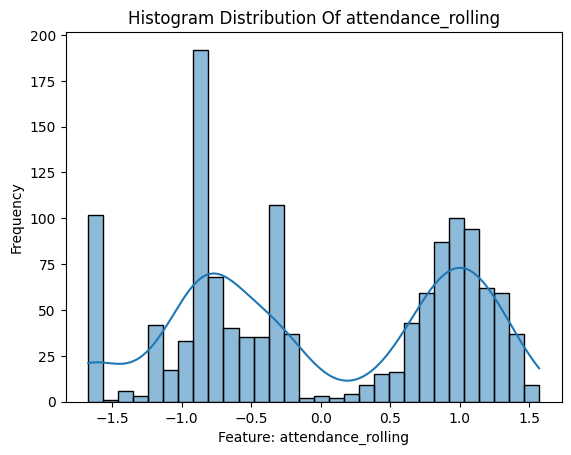

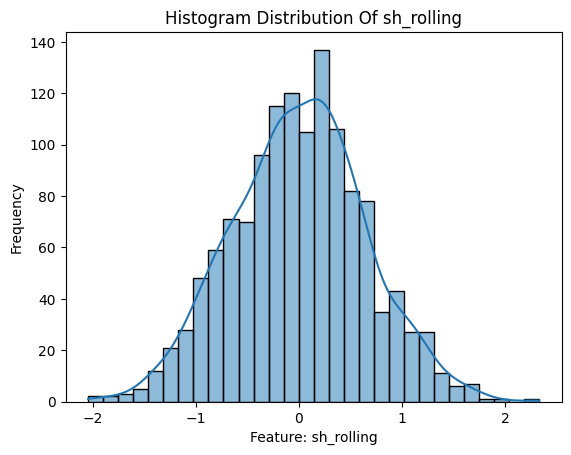

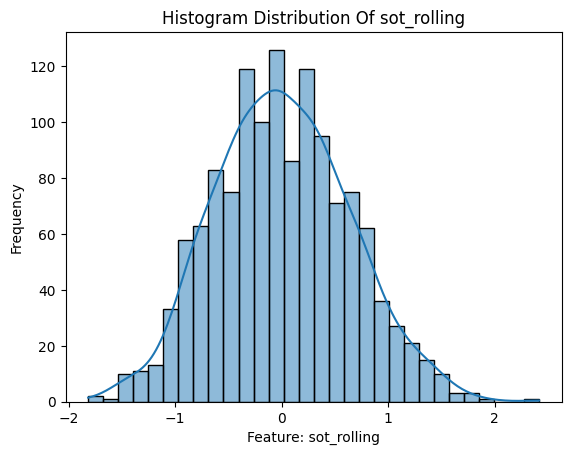

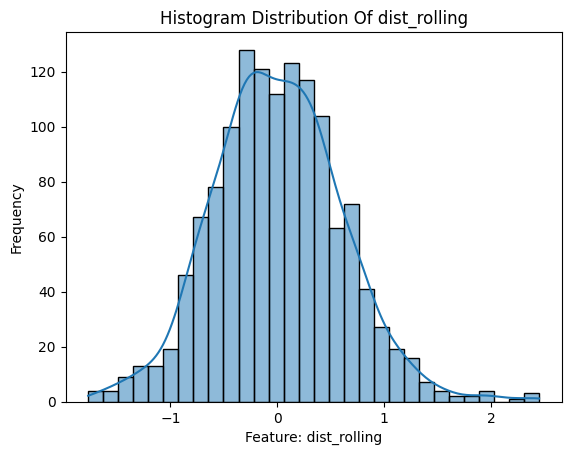

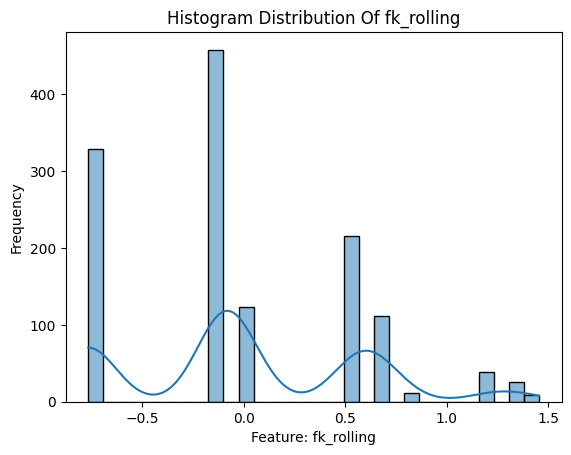

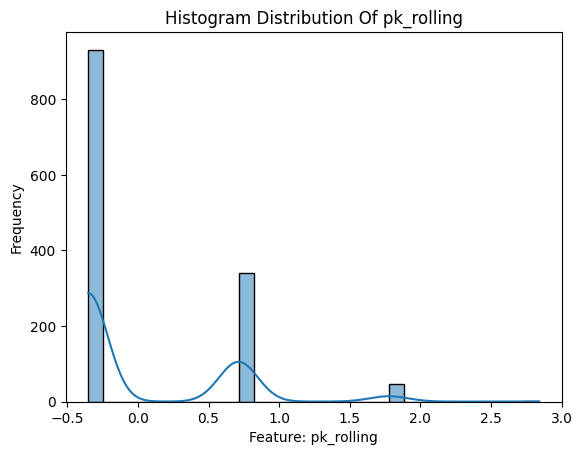

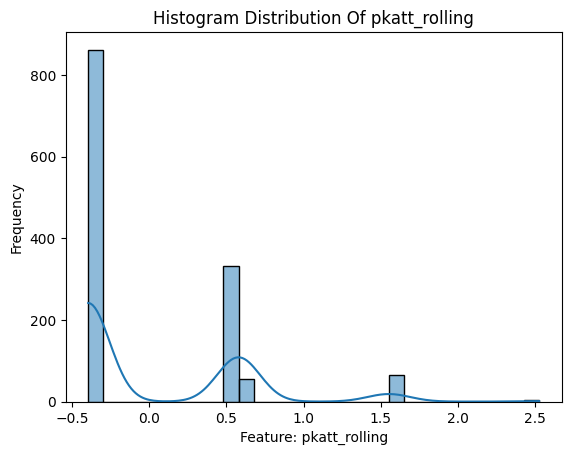

In [67]:
for i in new_cols:
    sns.histplot(rolling_grouped_data[i], kde=True, bins=30)
    plt.xlabel(f"Feature: {i}")
    plt.ylabel("Frequency")
    plt.title(f"Histogram Distribution Of {i}")
    plt.show()

In [68]:
#Winsorization
for i in new_cols:
    lower_bound = rolling_grouped_data[i].quantile(0.05)
    upper_bound = rolling_grouped_data[i].quantile(0.95)
    rolling_grouped_data[i] = rolling_grouped_data[i].clip(lower_bound, upper_bound)

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'round'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'venue'}>,
        <Axes: title={'center': 'result'}>],
       [<Axes: title={'center': 'gf'}>, <Axes: title={'center': 'ga'}>,
        <Axes: title={'center': 'opponent'}>,
        <Axes: title={'center': 'xg'}>, <Axes: title={'center': 'xga'}>,
        <Axes: title={'center': 'poss'}>],
       [<Axes: title={'center': 'attendance'}>,
        <Axes: title={'center': 'formation'}>,
        <Axes: title={'center': 'referee'}>,
        <Axes: title={'center': 'sh'}>, <Axes: title={'center': 'sot'}>,
        <Axes: title={'center': 'dist'}>],
       [<Axes: title={'center': 'fk'}>, <Axes: title={'center': 'pk'}>,
        <Axes: title={'center': 'pkatt'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'team'}>,
        <Axes: title={'center': 'gf_rolling'}>],
    

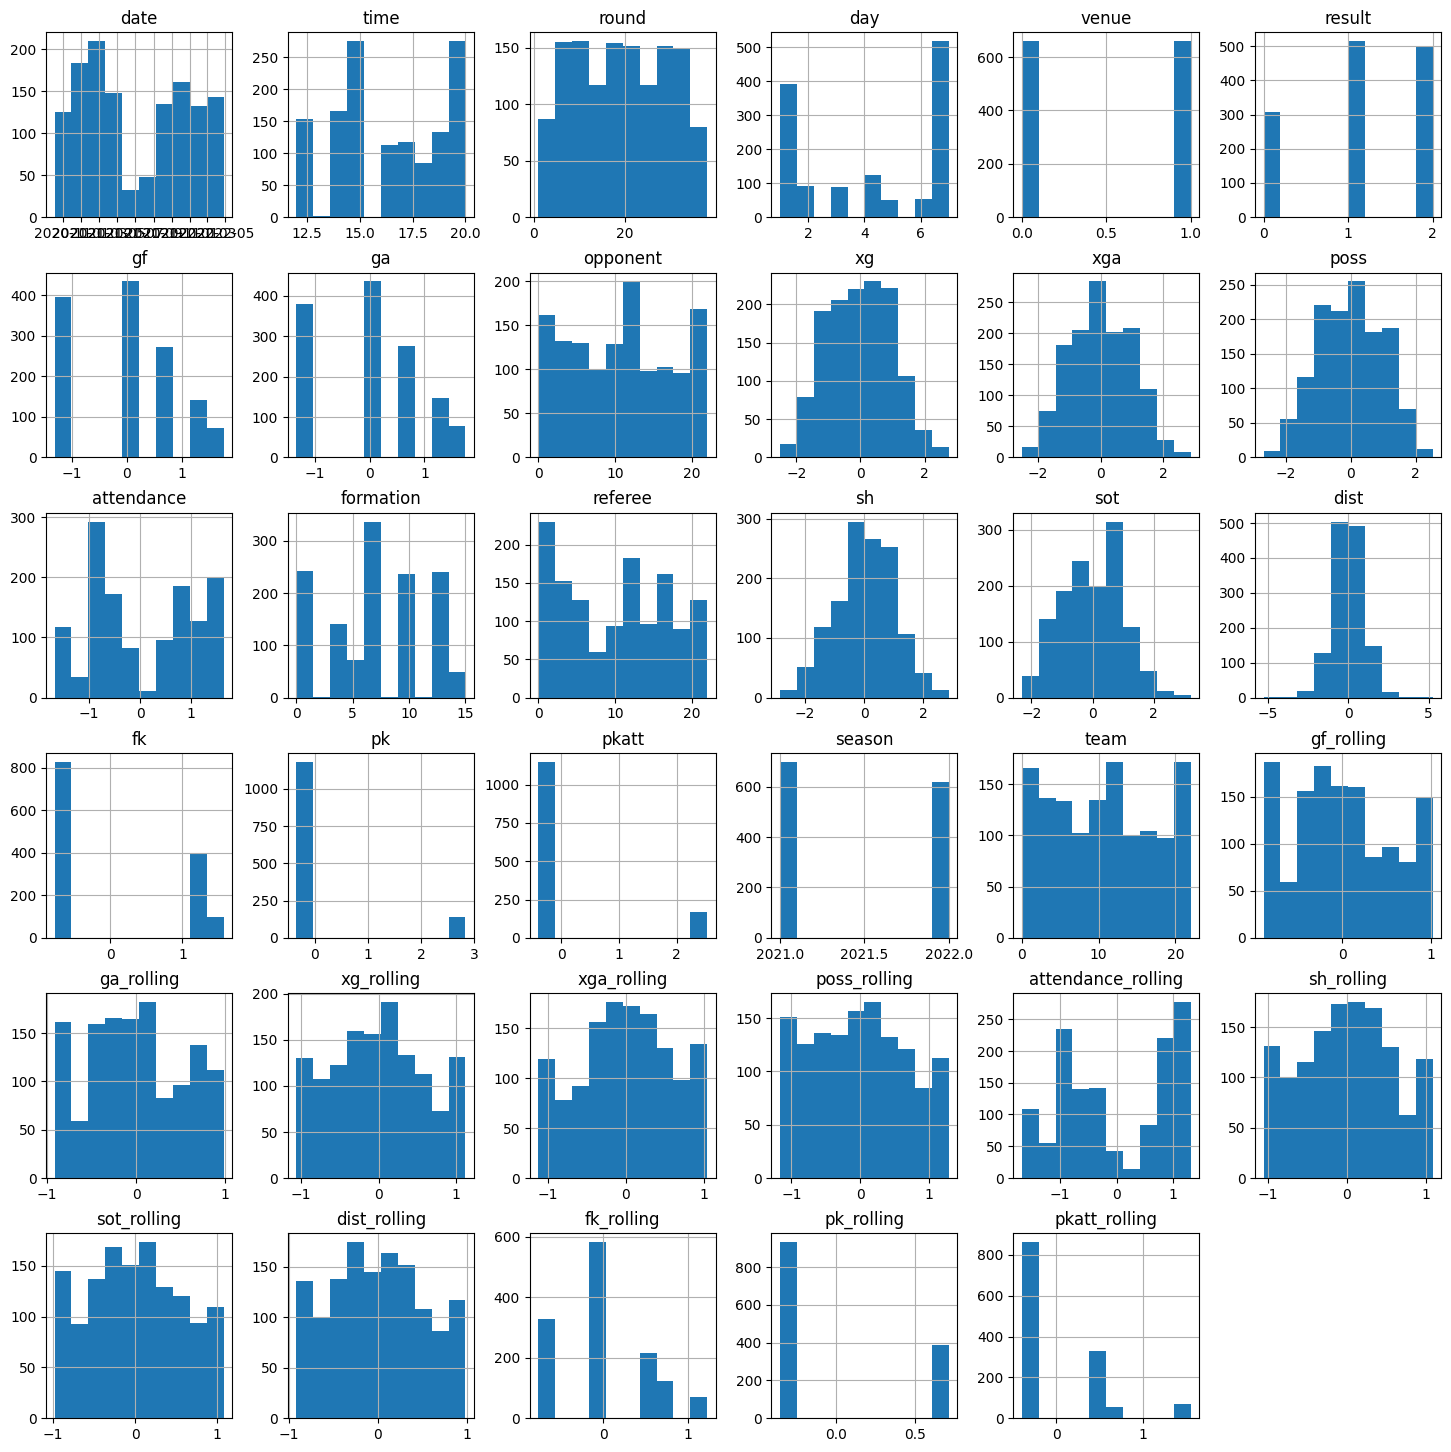

In [69]:
rolling_grouped_data.hist(figsize=(18,18))

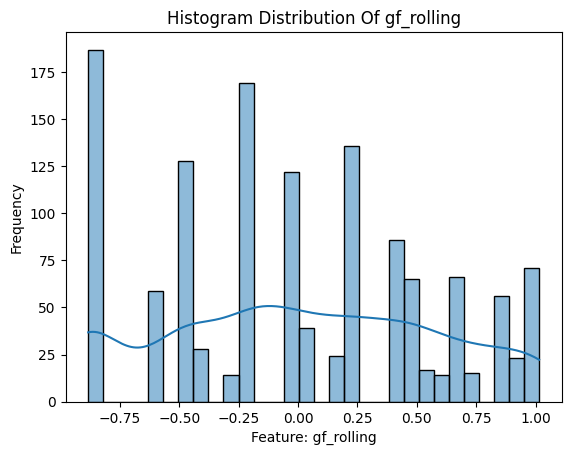

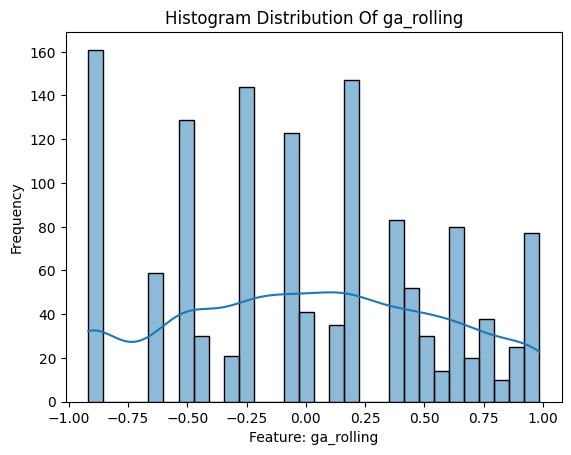

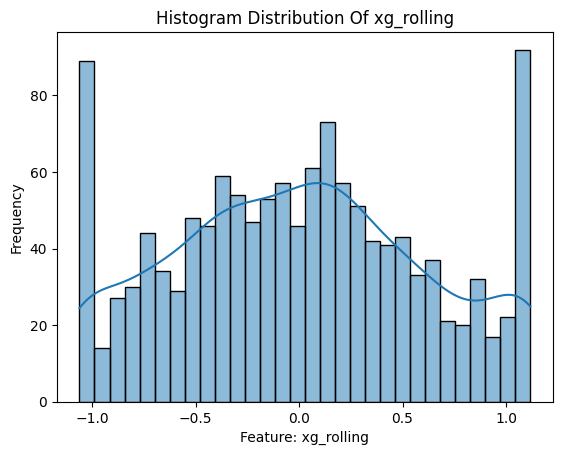

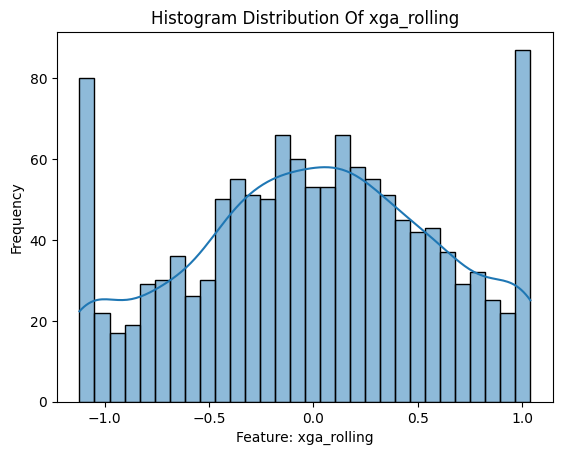

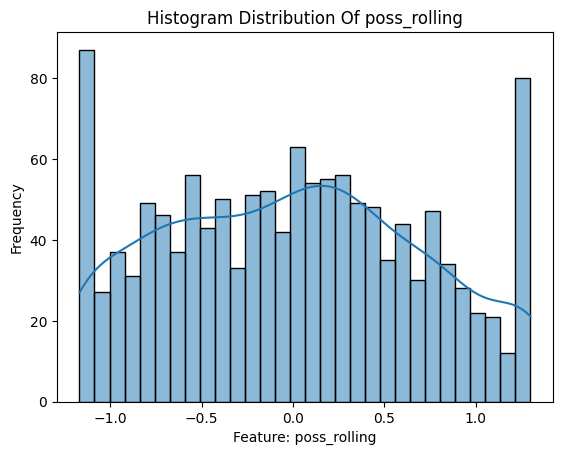

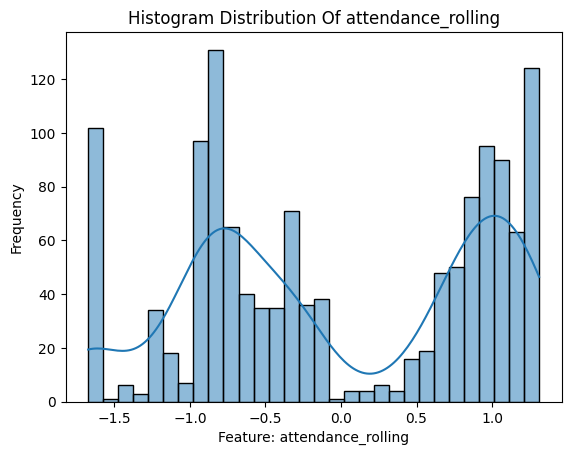

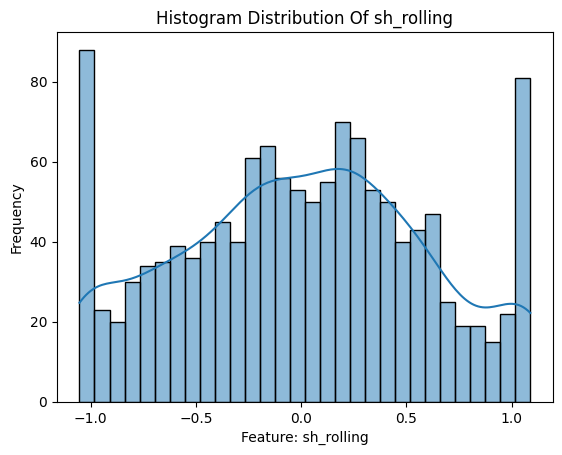

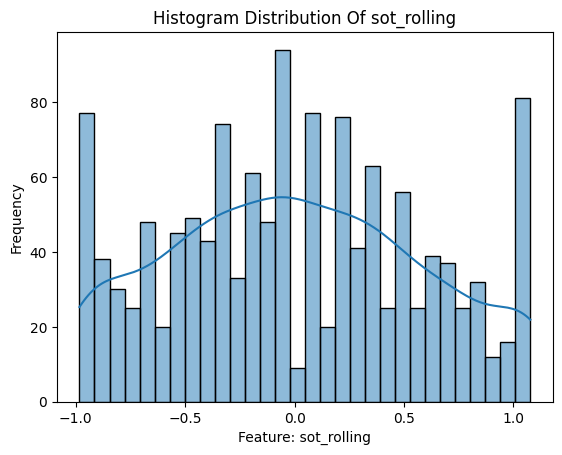

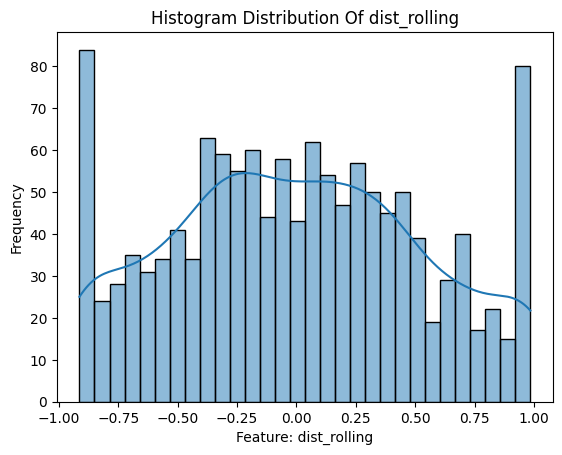

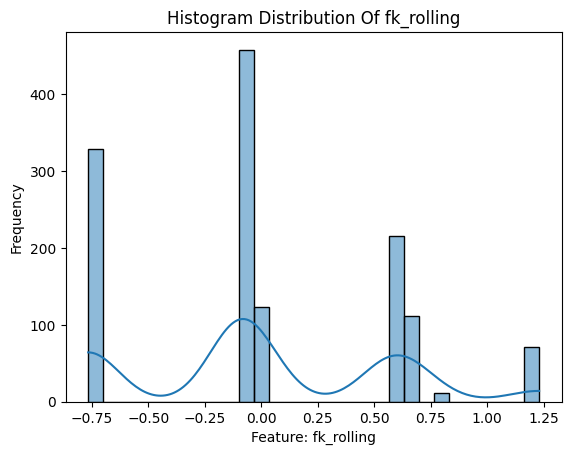

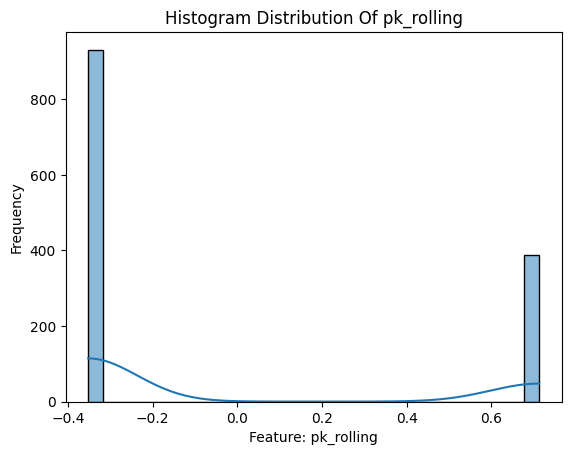

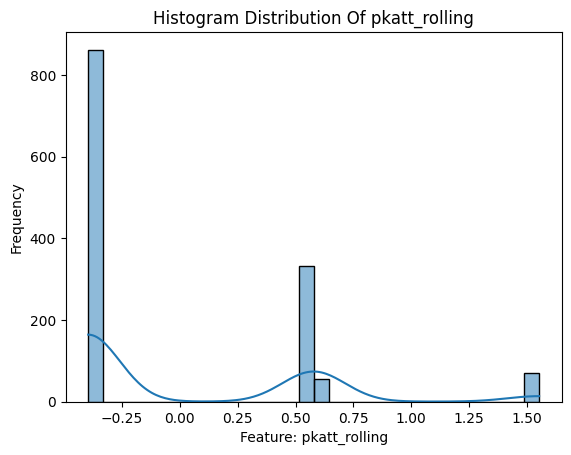

In [70]:
for i in new_cols:
    sns.histplot(rolling_grouped_data[i], kde=True, bins=30)
    plt.xlabel(f"Feature: {i}")
    plt.ylabel("Frequency")
    plt.title(f"Histogram Distribution Of {i}")
    plt.show()

##### EDA (Correlation and VIF)

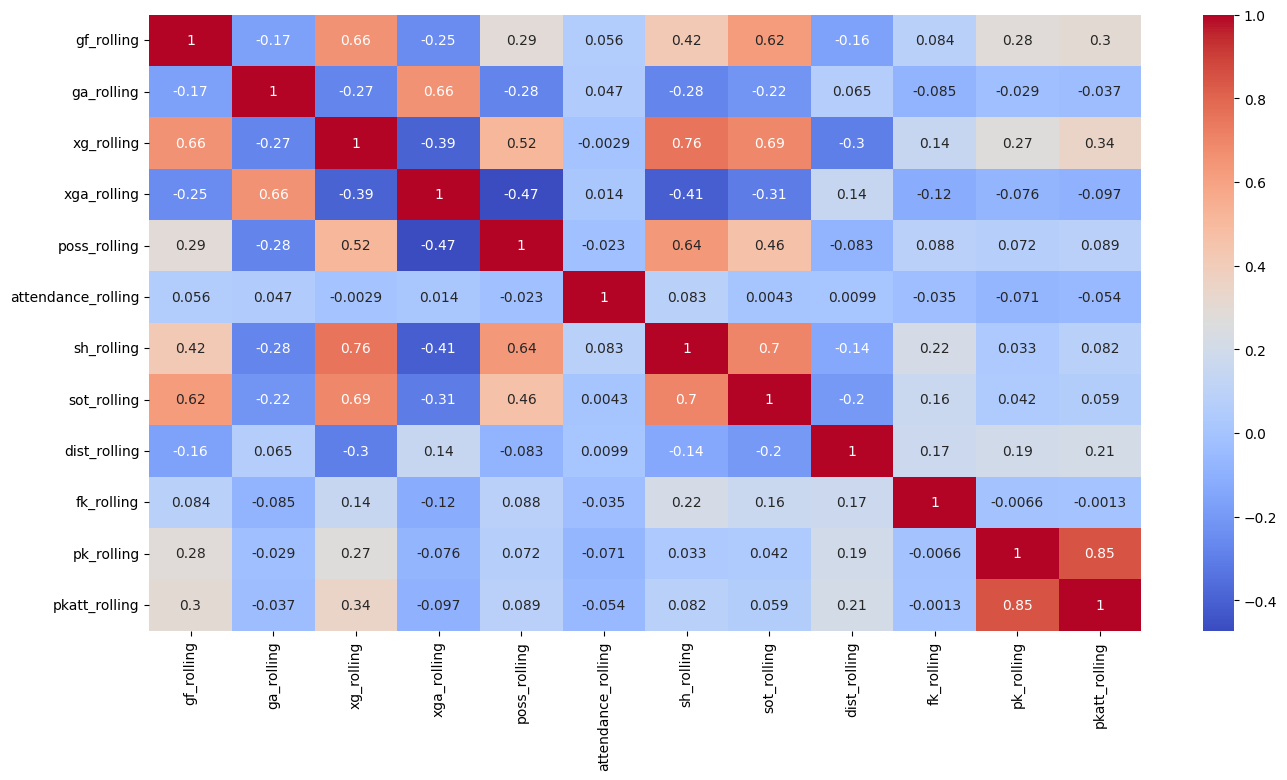

In [71]:
plt.figure(figsize=(16, 8))
sns.heatmap(rolling_grouped_data[new_cols].corr(), annot=True, cmap="coolwarm")
plt.show()

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Features'] = rolling_grouped_data[new_cols].columns
vif_data['VIF'] = [variance_inflation_factor(rolling_grouped_data[new_cols].values, i) for i in range(rolling_grouped_data[new_cols].shape[1])]
vif_data

,Features,VIF
0,gf_rolling,2.272250
1,ga_rolling,1.792491
2,xg_rolling,4.874222
3,xga_rolling,2.183385
4,poss_rolling,1.897270
5,attendance_rolling,1.056264
6,sh_rolling,4.025839
7,sot_rolling,2.835224
8,dist_rolling,1.444404
9,fk_rolling,1.127194


##### Train Test Split And Scale Data

In [73]:
rolling_grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1319 non-null   datetime64[ns]
 1   time                1319 non-null   int64         
 2   round               1319 non-null   int64         
 3   day                 1319 non-null   float64       
 4   venue               1319 non-null   int64         
 5   result              1319 non-null   int64         
 6   gf                  1319 non-null   float64       
 7   ga                  1319 non-null   float64       
 8   opponent            1319 non-null   int64         
 9   xg                  1319 non-null   float64       
 10  xga                 1319 non-null   float64       
 11  poss                1319 non-null   float64       
 12  attendance          1319 non-null   float64       
 13  formation           1319 non-null   int64       

In [74]:
x = rolling_grouped_data.drop(['result', 'date'], axis=1)
y = rolling_grouped_data['result']
cat = ['round', 'day', 'venue', 'opponent', 'formation', 'referee', 'season', 'team', 'time']
cont = ['gf', 'ga', 'xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'gf_rolling', 'ga_rolling', 'xg_rolling', 'xga_rolling', 'poss_rolling', 'attendance_rolling', 'sh_rolling', 'sot_rolling', 'dist_rolling', 'fk_rolling', 'pk_rolling', 'pkatt_rolling']
#Splitting the Dataset:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state=32)
#Getting the Categorical And Continuous Features:
X_train_cont = X_train[cont]
X_train_cat = X_train[cat]
X_test_cont = X_test[cont]
X_test_cat = X_test[cat]
#Scaling The Continuous Features:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_cont = pd.DataFrame(scaler.fit_transform(X_train_cont), columns=cont, index=X_train_cont.index)
X_test_cont = pd.DataFrame(scaler.transform(X_test_cont), columns=cont, index=X_test_cont.index)
#Merging Together:
X_train = pd.concat([X_train_cat, X_train_cont], axis=1)
X_test = pd.concat([X_test_cat, X_test_cont], axis=1)

y_test.value_counts()

result
1    103
2    100
0     61
Name: count, dtype: int64

##### Training The Model

In [75]:
from sklearn.ensemble import RandomForestClassifier
import time
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=15)
start_time = time.time()
rfc.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time
print(f"Total Training Time Elapsed: {total_time:.2f}")

Total Training Time Elapsed: 0.44


In [76]:
y_predict = rfc.predict(X_test)
rfc_predictions = pd.DataFrame({"Actual_Values": y_test, "Predicted_Values": y_predict})
rfc_predictions.head(20)

,Actual_Values,Predicted_Values
994,1,1
1310,1,1
0,2,2
617,2,2
718,2,2
1066,1,1
181,2,2
450,2,2
245,1,1
1189,1,1


##### Evaluation of the training

In [77]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
precision = precision_score(y_test, y_predict, average="weighted")
recall = recall_score(y_test, y_predict, average="weighted")
accuracy = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average="weighted")
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["D", "L", "W"])

In [78]:
precision

0.9322778880590538

In [79]:
recall

0.9318181818181818

In [80]:
accuracy

0.9318181818181818

In [81]:
f1

0.9300199353612228

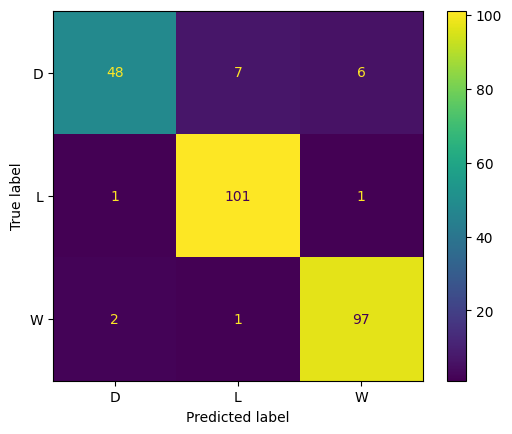

In [82]:
disp.plot()

### General Model

##### 1. Train, Test And Split + Scaling

In [83]:
general_features = ['team', 'opponent', 'venue','formation','referee','round','gf_rolling','ga_rolling','xg_rolling','xga_rolling','poss_rolling','attendance_rolling','sh_rolling','sot_rolling','dist_rolling','fk_rolling','pk_rolling','pkatt_rolling']
x = rolling_grouped_data[general_features]
y = rolling_grouped_data['result']
cat = ['round', 'venue', 'opponent', 'formation', 'referee', 'team']
cont = ['gf_rolling', 'ga_rolling', 'xg_rolling', 'xga_rolling', 'poss_rolling', 'attendance_rolling', 'sh_rolling', 'sot_rolling', 'dist_rolling', 'fk_rolling', 'pk_rolling', 'pkatt_rolling']
#Splitting The Dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=32)
#Getting The Categorical And Continuous Features
X_train_cont = X_train[cont]
X_train_cat = X_train[cat]
X_test_cont = X_test[cont]
X_test_cat = X_test[cat]
#Scaling The Dataset
general_scaler = StandardScaler()
X_train_cont = pd.DataFrame(general_scaler.fit_transform(X_train_cont), columns=cont, index=X_train_cont.index)
X_test_cont = pd.DataFrame(general_scaler.transform(X_test_cont), columns=cont, index=X_test_cont.index)
#Merging The Data Back
X_train = pd.concat([X_train_cat, X_train_cont], axis=1)
X_test = pd.concat([X_test_cat, X_test_cont], axis=1)

In [88]:
X_test

,round,venue,opponent,formation,referee,team,gf_rolling,ga_rolling,xg_rolling,xga_rolling,poss_rolling,attendance_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
994,19,0,10,13,21,17,-1.565716,-1.640151,-1.722640,-0.594056,0.016719,-0.824538,-1.785647,-1.145529,1.851362,1.000650,-0.645064,-0.679862
1310,20,0,0,1,13,22,0.109251,-0.890387,-0.644361,0.819990,-0.482666,1.099571,0.331308,0.582414,0.038717,1.198210,-0.645064,-0.679862
0,4,1,16,10,12,0,1.199066,-0.075442,0.616610,0.438487,0.055727,-0.981387,-1.552672,-0.068348,-1.446101,0.031424,-0.645064,-0.679862
617,14,0,18,7,4,10,0.444413,-0.421940,0.186011,-1.014239,1.410710,-0.373631,0.850883,0.096227,0.612982,-0.166135,-0.645064,-0.679862
718,14,0,17,7,16,12,-0.350906,-1.640151,1.495670,-1.882341,1.897492,-0.264176,1.344097,0.512509,-0.180466,1.198210,1.550234,1.019793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,3,0,15,13,19,10,0.403747,1.293790,-0.152133,1.137808,0.077342,0.690673,-1.567277,-0.472937,0.561777,-1.332921,1.550234,1.019793
412,9,1,14,10,5,6,0.863904,0.796271,0.044644,-0.072881,0.151763,0.944452,-0.221592,0.096227,1.425008,-0.166135,1.550234,1.019793
1076,31,1,13,10,3,18,0.863904,0.046507,0.482405,0.522085,0.386827,-1.715145,-1.183959,-0.889674,0.002273,1.395769,1.550234,1.019793
472,1,1,17,7,1,7,-1.565716,0.201701,-0.291369,0.415551,-0.529715,-0.604887,0.145049,0.096227,0.084868,-1.332921,-0.645064,1.019793


##### 2. Training The Model

In [84]:
from sklearn.ensemble import RandomForestClassifier
import time
general_rfc = RandomForestClassifier(n_estimators=100, min_samples_split=15)
start_time = time.time()
general_rfc.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time
print(f"Total Training Time Elapsed: {total_time:.2f}")

Total Training Time Elapsed: 0.42


##### 3. Exporting The Pickle Files

In [85]:
import pickle
# Model
with open('model/model.pkl', 'wb') as f:
    pickle.dump(general_rfc, f)
#Scaler
with open('model/scaler.pkl', 'wb') as f:
    pickle.dump(general_scaler, f)
#Power Transformer not needed as most of the features taken will be categorical
# with open('model/powerTransform.pkl', 'wb') as f:
#     pickle.dump(pt, f)
#Team Encoder
with open('model/teamEncoder.pkl', 'wb') as f:
    pickle.dump(team_encoder, f)
#Opponent Encoder
with open('model/opponentEncoder.pkl', 'wb') as f:
    pickle.dump(opponent_encoder, f)
#Formation Encoder
with open('model/formationEncoder.pkl', 'wb') as f:
    pickle.dump(formation_encoder, f)
#Referee Encoder
with open('model/refereeEncoder.pkl', 'wb') as f:
    pickle.dump(referee_encoder, f)
#Result Encoder To Inverse Transform
with open('model/resultEncoder.pkl', 'wb') as f:
    pickle.dump(result_encoder, f)

##### 4. Exporting The Historical Data

In [86]:
# Save historical data with transformed stats for rolling calculations
rolling_grouped_data.to_csv('dataset/historical_data.csv', index=False)